In [1]:
import glob 
from os import path 
from time import perf_counter as clock

from astropy.io import fits
from scipy import ndimage 
import numpy as np

import ppxf as ppxf_package
from ppxf.ppxf import ppxf
import ppxf.ppxf_util as util

import matplotlib.pyplot as plt

In [2]:
#def ppxf_example_kinematics_sauron():
ppxf_dir = '/home/nicole/.local/lib/python3.8/site-packages/ppxf' 
eso325_dir = '/home/nicole/eso325/espectros' #caminho da pasta

In [3]:
file = eso325_dir + '/36x43.fits'    #Nome do arquivo
hdu = fits.open(file)                #Abertura do arquivo #This is the top-level FITS object. When a FITS file is opened, a HDUList object is returned.
gal_lin = hdu[1].data                #Fluxo
h1 = hdu[1].header                   #Header
#print(gal_lin)

noise = np.sqrt(hdu[2].data) # tirando raiz da extensão STAT do arquivo FITS(variância de cada medida), calculando ruído como desvio padrão

lamRange1 = h1['CRVAL1'] + np.array([0., h1['CDELT1']*(h1['NAXIS1'] - 1)]) #define comprimento de onda inicial e final em um array.
FWHM_gal = 2.71  #medida do quanto o telesc. consegue separar 2 linhas de absorção que estão próximas.

wave = np.arange(lamRange1[0], lamRange1[1] + 1.25 , 1.25)

mask = wave < 5600

gal_lin = gal_lin[mask] #novo fluxo mascarado (até 5600A)
wave    = wave[mask]    #novo comprimento de onda mascarado (até 5600A)
noise   = noise[mask]   #novo noise mascarado (até 5600A)

lamRange1 = h1['CRVAL1'] + np.array([0., h1['CDELT1']*(len(gal_lin) - 1)]) #soma do primeiro comp. de onda com o que falta para chegar no último.
print(lamRange1)

galaxy_rebin, logLam1, velscale = util.log_rebin(lamRange1, gal_lin) 
galaxy = galaxy_rebin/np.median(galaxy_rebin)  # Normalize o espectro para evitar problemas numéricos

noise = noise/np.median(galaxy_rebin)

vazdekis = glob.glob(ppxf_dir + '/miles_models/Mun1.30*.fits') #glob.glob lista todos arquivos do template
FWHM_tem = 2.51  # Vazdekis+10 spectra have a constant resolution FWHM of 2.51A.
velscale_ratio = 2  # adopts 2x higher spectral sampling for templates than for galaxy

hdu = fits.open(vazdekis[0])
ssp = hdu[0].data     # Speech Signal Processing module
h2 = hdu[0].header
lamRange2 = h2['CRVAL1'] + np.array([0., h2['CDELT1']*(h2['NAXIS1'] - 1)]) 
sspNew, logLam2, velscale_temp = util.log_rebin(lamRange2, ssp, velscale=velscale/velscale_ratio)
templates = np.empty((sspNew.size, len(vazdekis)))

FWHM_dif = np.sqrt(FWHM_gal**2 - FWHM_tem**2) #piorando templates para ficar parecido com galaxias.
sigma = FWHM_dif/2.355/h2['CDELT1']  # Sigma difference in pixels

for j, file in enumerate(vazdekis): #j = 149
    hdu = fits.open(file)
    ssp = hdu[0].data
    ssp = ndimage.gaussian_filter1d(ssp, sigma) #degrada template # axis = -1, cval = 0.0, truncate = 4.0
    sspNew, logLam2, velscale_temp = util.log_rebin(lamRange2, ssp, velscale=velscale/velscale_ratio) 
    templates[:, j] = sspNew/np.median(sspNew)  # Normalizes templates

c = 299792.458  #Speed of light in km/s
dv = (np.mean(logLam2[:velscale_ratio]) - logLam1[0])*c  # km/s  # dv = -92777.66322243382

z = 0.035  # Initial redshift estimate of the galaxy
goodPixels = util.determine_goodpixels(logLam1, lamRange2, z)

vel = c*np.log(1 + z)   # eq.(8) of Cappellari (2017) #vel = 449.3517573723122
start = [vel, 200.]  # (km/s), starting guess for [V, sigma] --> com estimativa inicial p/ parâmetros LOSVD
t = clock() #t = 2220.969080546


[4750.17382812 5598.92382812]


 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9995       389    -0.018     0.003
chi2/DOF: 0.6529; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 32; Status: 4
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150


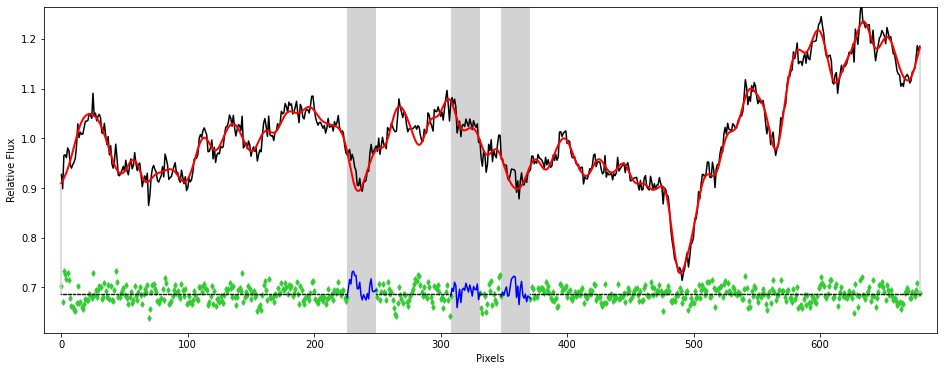

In [4]:
plt.figure(figsize=(16,6))
pp = ppxf(templates, galaxy, noise, velscale, start,
              goodpixels=goodPixels, plot=True, moments=4,
              degree=10, vsyst=dv, velscale_ratio=velscale_ratio) #vsyst --> vel. sistemática da expansão do universo
#chi2 = ideia de quão bom o ajuste está / DOF = grau liberdade  #degree --> melhora ajuste 

In [5]:
len(pp.sol)

4

In [8]:
for y in range(75):
    for x in range(90):
        
        import glob 
        from os import path 
        from time import perf_counter as clock

        from astropy.io import fits
        from scipy import ndimage 
        import numpy as np
            
        import ppxf as ppxf_package
        from ppxf.ppxf import ppxf
        import ppxf.ppxf_util as util
    
        import matplotlib.pyplot as plt
        
        
        ppxf_dir = '/home/nicole/.local/lib/python3.8/site-packages/ppxf' 
        eso325_dir = '/home/nicole/eso325/espectros' #caminho da pasta
        
        file = eso325_dir + '/%dx%d.fits'%(y,x)     #Nome do arquivo
        hdu = fits.open(file)                #Abertura do arquivo #This is the top-level FITS object. When a FITS file is opened, a HDUList object is returned.
        gal_lin = hdu[1].data                #Fluxo
        h1 = hdu[1].header                   #Header
        #print(gal_lin)

        noise = np.sqrt(hdu[2].data) # tirando raiz da extensão STAT do arquivo FITS(variância de cada medida), calculando ruído como desvio padrão

        lamRange1 = h1['CRVAL1'] + np.array([0., h1['CDELT1']*(h1['NAXIS1'] - 1)]) #define comprimento de onda inicial e final em um array.
        FWHM_gal = 2.71  #medida do quanto o telesc. consegue separar 2 linhas de absorção que estão próximas.

        wave = np.arange(lamRange1[0], lamRange1[1] + 1.25 , 1.25)

        mask = wave < 5600

        gal_lin = gal_lin[mask] #novo fluxo mascarado (até 5600A)
        wave    = wave[mask]    #novo comprimento de onda mascarado (até 5600A)
        noise   = noise[mask]   #novo noise mascarado (até 5600A)

        lamRange1 = h1['CRVAL1'] + np.array([0., h1['CDELT1']*(len(gal_lin) - 1)]) #soma do primeiro comp. de onda com o que falta para chegar no último.

        galaxy_rebin, logLam1, velscale = util.log_rebin(lamRange1, gal_lin) 
        galaxy = galaxy_rebin/np.median(galaxy_rebin)  # Normalize o espectro para evitar problemas numéricos

        noise = noise/np.median(galaxy_rebin)

        vazdekis = glob.glob(ppxf_dir + '/miles_models/Mun1.30*.fits') #glob.glob lista todos arquivos do template
        FWHM_tem = 2.51  # Vazdekis+10 spectra have a constant resolution FWHM of 2.51A.
        velscale_ratio = 2  # adopts 2x higher spectral sampling for templates than for galaxy

        hdu = fits.open(vazdekis[0])
        ssp = hdu[0].data     # Speech Signal Processing module
        h2 = hdu[0].header
        lamRange2 = h2['CRVAL1'] + np.array([0., h2['CDELT1']*(h2['NAXIS1'] - 1)]) 
        sspNew, logLam2, velscale_temp = util.log_rebin(lamRange2, ssp, velscale=velscale/velscale_ratio)
        templates = np.empty((sspNew.size, len(vazdekis)))

        FWHM_dif = np.sqrt(FWHM_gal**2 - FWHM_tem**2) #piorando templates para ficar parecido com galaxias.
        sigma = FWHM_dif/2.355/h2['CDELT1']  # Sigma difference in pixels

        for j, file in enumerate(vazdekis): #j = 149
            hdu = fits.open(file)
            ssp = hdu[0].data
            sspNew = ndimage.gaussian_filter1d(ssp, sigma) #degrada template # axis = -1, cval = 0.0, truncate = 4.0
            sspNew, logLam2, velscale_temp = util.log_rebin(lamRange2, ssp, velscale=velscale/velscale_ratio) 
            templates[:, j] = sspNew/np.median(sspNew)  # Normalizes templates

        c = 299792.458  #Speed of light in km/s
        dv = (np.mean(logLam2[:velscale_ratio]) - logLam1[0])*c  # km/s  # dv = -92777.66322243382
    
        z = 0.035  # Initial redshift estimate of the galaxy
        goodPixels = util.determine_goodpixels(logLam1, lamRange2, z)

        vel = c*np.log(1 + z)   # eq.(8) of Cappellari (2017) #vel = 449.3517573723122
        start = [vel, 200.]  # (km/s), starting guess for [V, sigma] --> com estimativa inicial p/ parâmetros LOSVD
        t = clock() #t = 2220.96908054
 
        pp = ppxf(templates, galaxy, noise, velscale, start,
                      goodpixels=goodPixels, plot=False, moments=4,
                      degree=10, vsyst=dv, velscale_ratio=velscale_ratio)
    
       #sol = [vel, sigma, h3, h4]
        
        vel = pp.sol[0]
        sigma = pp.sol[1]
        h3 = pp.sol[2]
        h4 = pp.sol[3]
        chi2_DOF = pp.chi2
        
        vel_error = pp.error[0]
        sigma_error = pp.error[1]
        h3_error = pp.error[2]
        h4_error = pp.error[3]
        
        
        newrow = [np.int(y),np.int(x),vel,sigma,h3,h4,chi2_DOF,vel_error,sigma_error,h3_error,h4_error]
        if y == 0 and x == 0:
            table = np.array([np.int(y),np.int(x),vel,sigma,h3,h4,chi2_DOF,vel_error,sigma_error,h3_error,h4_error])
        else:
            table = np.vstack([table,newrow]) #adiciona uma linha na horizontal abaixo da linha acima.

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10216       190    -0.017    -0.023
chi2/DOF: 1.645; degree = 10; mdegree = 0
method = capfit; Jac calls: 5; Func calls: 29; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  1 / 150


/tmp/ipykernel_6656/621564545.py:97: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  newrow = [np.int(y),np.int(x),vel,sigma,h3,h4,chi2_DOF,vel_error,sigma_error,h3_error,h4_error]
/tmp/ipykernel_6656/621564545.py:99: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10336       463     0.102    -0.027
chi2/DOF: 1.670; degree = 10; mdegree = 0
method = capfit; Jac calls: 16; Func calls: 87; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9992       235     0.038    -0.027
chi2/DOF: 1.769; degree = 10; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 41; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  1 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9767       480    -0.024    -0.014
chi2/DOF: 1.508; degree = 10; mdegree = 0
method = capfit; Jac calls: 12; Func calls: 68; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10232       190    -0.005    -0.010
chi2/DOF: 1.398; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 35; Status: 2
linear_meth

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10084       187    -0.008    -0.025
chi2/DOF: 1.430; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 36; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  1 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10030       240    -0.049    -0.009
chi2/DOF: 1.124; degree = 10; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 40; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9916       302     0.030    -0.095
chi2/DOF: 1.156; degree = 10; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 41; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  5 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9901       334    -0.011     0.003
chi2/DOF: 1.284; degree = 10; mdegree = 0
method = capfit; Jac calls: 8; Func calls: 45; Status: 2
linear_method

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10053       247     0.008    -0.057
chi2/DOF: 1.114; degree = 10; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 40; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  4 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9995       124    -0.019    -0.012
chi2/DOF: 1.210; degree = 10; mdegree = 0
method = capfit; Jac calls: 9; Func calls: 50; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9956       380     0.005    -0.021
chi2/DOF: 1.055; degree = 10; mdegree = 0
method = capfit; Jac calls: 5; Func calls: 28; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9991       408    -0.015     0.028
chi2/DOF: 1.318; degree = 10; mdegree = 0
method = capfit; Jac calls: 10; Func calls: 54; Status: 2
linear_metho

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10222       134    -0.018    -0.000
chi2/DOF: 1.315; degree = 10; mdegree = 0
method = capfit; Jac calls: 2; Func calls: 14; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10328       390     0.024    -0.025
chi2/DOF: 1.559; degree = 10; mdegree = 0
method = capfit; Jac calls: 5; Func calls: 28; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9801       539    -0.031     0.031
chi2/DOF: 1.478; degree = 10; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 41; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  1 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10089       244    -0.013    -0.041
chi2/DOF: 1.569; degree = 10; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 41; Status: 2
linear_method

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9943       130     0.033     0.022
chi2/DOF: 1.042; degree = 10; mdegree = 0
method = capfit; Jac calls: 9; Func calls: 51; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10010       226     0.008     0.010
chi2/DOF: 1.252; degree = 10; mdegree = 0
method = capfit; Jac calls: 9; Func calls: 50; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10157       436    -0.002     0.066
chi2/DOF: 1.258; degree = 10; mdegree = 0
method = capfit; Jac calls: 11; Func calls: 58; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9974       346     0.009    -0.083
chi2/DOF: 1.048; degree = 10; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 41; Status: 2
linear_metho

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9998       208    -0.046    -0.029
chi2/DOF: 1.173; degree = 10; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 41; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10028       118    -0.021    -0.006
chi2/DOF: 1.549; degree = 10; mdegree = 0
method = capfit; Jac calls: 10; Func calls: 57; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  4 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10081       299     0.014    -0.044
chi2/DOF: 1.160; degree = 10; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 39; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9932       190     0.063    -0.032
chi2/DOF: 1.338; degree = 10; mdegree = 0
method = capfit; Jac calls: 8; Func calls: 46; Status: 2
linear_metho

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9973        32     0.021    -0.026
chi2/DOF: 1.470; degree = 10; mdegree = 0
method = capfit; Jac calls: 13; Func calls: 72; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10074       373     0.043    -0.047
chi2/DOF: 1.536; degree = 10; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 40; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10094       472    -0.041     0.045
chi2/DOF: 1.166; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 36; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  1 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10034       285    -0.052     0.015
chi2/DOF: 1.416; degree = 10; mdegree = 0
method = capfit; Jac calls: 5; Func calls: 31; Status: 2
linear_metho

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9670       432    -0.088     0.020
chi2/DOF: 1.466; degree = 10; mdegree = 0
method = capfit; Jac calls: 11; Func calls: 61; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10101       302    -0.079     0.000
chi2/DOF: 1.226; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 35; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9938       136    -0.031     0.003
chi2/DOF: 1.170; degree = 10; mdegree = 0
method = capfit; Jac calls: 8; Func calls: 46; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  1 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10096       431    -0.008    -0.051
chi2/DOF: 1.287; degree = 10; mdegree = 0
method = capfit; Jac calls: 8; Func calls: 46; Status: 2
linear_metho

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9984       282    -0.042     0.032
chi2/DOF: 1.553; degree = 10; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 40; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  1 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10119       350     0.023     0.015
chi2/DOF: 1.546; degree = 10; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 40; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  1 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9960       398     0.020    -0.011
chi2/DOF: 1.215; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 32; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  1 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9985       330     0.004     0.002
chi2/DOF: 1.313; degree = 10; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 40; Status: 2
linear_method

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10288       388     0.045    -0.032
chi2/DOF: 1.311; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 34; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10037       340    -0.001     0.023
chi2/DOF: 1.410; degree = 10; mdegree = 0
method = capfit; Jac calls: 8; Func calls: 46; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10020       248    -0.037    -0.009
chi2/DOF: 1.419; degree = 10; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 42; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9967       349    -0.041    -0.041
chi2/DOF: 1.516; degree = 10; mdegree = 0
method = capfit; Jac calls: 10; Func calls: 57; Status: 2
linear_metho

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10006       259    -0.008    -0.076
chi2/DOF: 1.207; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 33; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9976       288    -0.012    -0.080
chi2/DOF: 1.243; degree = 10; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 39; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9926       381     0.032    -0.100
chi2/DOF: 1.155; degree = 10; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 40; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10050       348    -0.010    -0.069
chi2/DOF: 1.277; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 36; Status: 2
linear_method

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9860       243    -0.020    -0.017
chi2/DOF: 1.266; degree = 10; mdegree = 0
method = capfit; Jac calls: 8; Func calls: 47; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9887       703    -0.002     0.006
chi2/DOF: 1.327; degree = 10; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 42; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  4 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10015       213     0.005    -0.056
chi2/DOF: 1.250; degree = 10; mdegree = 0
method = capfit; Jac calls: 5; Func calls: 31; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  5 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10017       215     0.009     0.036
chi2/DOF: 1.147; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 36; Status: 2
linear_method

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10076       105     0.009    -0.015
chi2/DOF: 1.308; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 35; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  1 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10113       299     0.053     0.038
chi2/DOF: 1.201; degree = 10; mdegree = 0
method = capfit; Jac calls: 8; Func calls: 44; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9945       200    -0.001     0.012
chi2/DOF: 1.190; degree = 10; mdegree = 0
method = capfit; Jac calls: 9; Func calls: 52; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9981       234     0.011     0.009
chi2/DOF: 1.394; degree = 10; mdegree = 0
method = capfit; Jac calls: 8; Func calls: 45; Status: 2
linear_method

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10136       311     0.051    -0.014
chi2/DOF: 1.067; degree = 10; mdegree = 0
method = capfit; Jac calls: 5; Func calls: 30; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  1 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10270       293    -0.007    -0.002
chi2/DOF: 1.594; degree = 10; mdegree = 0
method = capfit; Jac calls: 5; Func calls: 30; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10057       310    -0.026     0.019
chi2/DOF: 1.282; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 34; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10019       288     0.042     0.019
chi2/DOF: 1.133; degree = 10; mdegree = 0
method = capfit; Jac calls: 10; Func calls: 54; Status: 2
linear_metho

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10184       317     0.022    -0.030
chi2/DOF: 1.284; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 36; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10074       200    -0.006    -0.030
chi2/DOF: 1.595; degree = 10; mdegree = 0
method = capfit; Jac calls: 8; Func calls: 44; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9810       333    -0.029    -0.038
chi2/DOF: 1.297; degree = 10; mdegree = 0
method = capfit; Jac calls: 9; Func calls: 51; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10149       411    -0.016    -0.002
chi2/DOF: 1.424; degree = 10; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 40; Status: 2
linear_method

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10027       238     0.074    -0.092
chi2/DOF: 1.401; degree = 10; mdegree = 0
method = capfit; Jac calls: 9; Func calls: 50; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  4 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10007       307     0.029    -0.057
chi2/DOF: 1.339; degree = 10; mdegree = 0
method = capfit; Jac calls: 8; Func calls: 45; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  4 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9931       282    -0.041     0.016
chi2/DOF: 1.264; degree = 10; mdegree = 0
method = capfit; Jac calls: 10; Func calls: 57; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10097       313    -0.043     0.016
chi2/DOF: 1.471; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 35; Status: 2
linear_metho

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9991       374     0.080     0.066
chi2/DOF: 1.111; degree = 10; mdegree = 0
method = capfit; Jac calls: 8; Func calls: 45; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9974       223     0.036    -0.026
chi2/DOF: 1.132; degree = 10; mdegree = 0
method = capfit; Jac calls: 8; Func calls: 44; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10007       299     0.003     0.047
chi2/DOF: 1.196; degree = 10; mdegree = 0
method = capfit; Jac calls: 8; Func calls: 45; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  1 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10247       336     0.047    -0.010
chi2/DOF: 1.196; degree = 10; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 39; Status: 2
linear_method

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10070       178     0.012    -0.009
chi2/DOF: 1.587; degree = 10; mdegree = 0
method = capfit; Jac calls: 8; Func calls: 44; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  1 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9944       319    -0.034    -0.060
chi2/DOF: 1.179; degree = 10; mdegree = 0
method = capfit; Jac calls: 9; Func calls: 49; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9998       287     0.031    -0.025
chi2/DOF: 1.376; degree = 10; mdegree = 0
method = capfit; Jac calls: 9; Func calls: 50; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10078       247     0.044    -0.040
chi2/DOF: 1.337; degree = 10; mdegree = 0
method = capfit; Jac calls: 9; Func calls: 52; Status: 2
linear_method

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9988       326     0.032    -0.025
chi2/DOF: 1.232; degree = 10; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 41; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  4 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9973       262     0.063    -0.014
chi2/DOF: 1.331; degree = 10; mdegree = 0
method = capfit; Jac calls: 9; Func calls: 51; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10081       285    -0.023    -0.047
chi2/DOF: 1.281; degree = 10; mdegree = 0
method = capfit; Jac calls: 9; Func calls: 50; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10172       502     0.017     0.017
chi2/DOF: 1.345; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 36; Status: 2
linear_method

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9918       419     0.081    -0.023
chi2/DOF: 1.174; degree = 10; mdegree = 0
method = capfit; Jac calls: 9; Func calls: 49; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  1 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9936       277    -0.029    -0.048
chi2/DOF: 1.314; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 35; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  1 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10023       243    -0.015    -0.008
chi2/DOF: 1.061; degree = 10; mdegree = 0
method = capfit; Jac calls: 5; Func calls: 27; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10006       232    -0.008     0.037
chi2/DOF: 1.156; degree = 10; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 41; Status: 2
linear_method

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10184       237    -0.027     0.000
chi2/DOF: 1.627; degree = 10; mdegree = 0
method = capfit; Jac calls: 5; Func calls: 30; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9955       171    -0.008     0.022
chi2/DOF: 1.637; degree = 10; mdegree = 0
method = capfit; Jac calls: 9; Func calls: 52; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10116       346     0.087     0.015
chi2/DOF: 1.322; degree = 10; mdegree = 0
method = capfit; Jac calls: 8; Func calls: 46; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  5 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9941       157     0.036    -0.012
chi2/DOF: 1.273; degree = 10; mdegree = 0
method = capfit; Jac calls: 11; Func calls: 61; Status: 2
linear_metho

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10008       295    -0.053    -0.041
chi2/DOF: 1.086; degree = 10; mdegree = 0
method = capfit; Jac calls: 8; Func calls: 46; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9967       256    -0.041     0.014
chi2/DOF: 1.080; degree = 10; mdegree = 0
method = capfit; Jac calls: 9; Func calls: 50; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  4 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10033       246     0.025     0.031
chi2/DOF: 1.244; degree = 10; mdegree = 0
method = capfit; Jac calls: 9; Func calls: 52; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  1 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10221       290     0.017     0.070
chi2/DOF: 1.145; degree = 10; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 39; Status: 2
linear_method

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10040       221    -0.017     0.032
chi2/DOF: 1.211; degree = 10; mdegree = 0
method = capfit; Jac calls: 8; Func calls: 45; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10022       322    -0.067     0.012
chi2/DOF: 1.169; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 35; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9944       234    -0.044     0.023
chi2/DOF: 1.270; degree = 10; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 41; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  1 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9934       258     0.004    -0.037
chi2/DOF: 1.283; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 34; Status: 2
linear_method

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9905       296     0.023     0.024
chi2/DOF: 1.520; degree = 10; mdegree = 0
method = capfit; Jac calls: 9; Func calls: 50; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9912       452    -0.090     0.034
chi2/DOF: 1.457; degree = 10; mdegree = 0
method = capfit; Jac calls: 8; Func calls: 45; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9977       218     0.037    -0.033
chi2/DOF: 1.256; degree = 10; mdegree = 0
method = capfit; Jac calls: 8; Func calls: 46; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10125       170    -0.052    -0.011
chi2/DOF: 1.323; degree = 10; mdegree = 0
method = capfit; Jac calls: 5; Func calls: 31; Status: 2
linear_method

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9972       178     0.051     0.024
chi2/DOF: 1.267; degree = 10; mdegree = 0
method = capfit; Jac calls: 10; Func calls: 53; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10003       316     0.028    -0.018
chi2/DOF: 1.059; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 36; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  5 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10060       385     0.108     0.003
chi2/DOF: 1.230; degree = 10; mdegree = 0
method = capfit; Jac calls: 8; Func calls: 45; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10060       177    -0.055     0.041
chi2/DOF: 1.069; degree = 10; mdegree = 0
method = capfit; Jac calls: 9; Func calls: 51; Status: 2
linear_metho

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9943       205     0.006    -0.013
chi2/DOF: 1.331; degree = 10; mdegree = 0
method = capfit; Jac calls: 8; Func calls: 47; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  1 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10211       527     0.066    -0.036
chi2/DOF: 1.144; degree = 10; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 41; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10024       157     0.002    -0.022
chi2/DOF: 1.101; degree = 10; mdegree = 0
method = capfit; Jac calls: 11; Func calls: 61; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  1 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10160       395     0.080     0.003
chi2/DOF: 1.045; degree = 10; mdegree = 0
method = capfit; Jac calls: 8; Func calls: 44; Status: 2
linear_metho

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9987        85     0.004    -0.010
chi2/DOF: 1.381; degree = 10; mdegree = 0
method = capfit; Jac calls: 15; Func calls: 83; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  1 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10178       399     0.046    -0.027
chi2/DOF: 1.224; degree = 10; mdegree = 0
method = capfit; Jac calls: 5; Func calls: 27; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10059       328     0.023     0.008
chi2/DOF: 1.287; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 35; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10094       392     0.031    -0.034
chi2/DOF: 1.314; degree = 10; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 40; Status: 2
linear_metho

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10089       329    -0.001     0.037
chi2/DOF: 1.033; degree = 10; mdegree = 0
method = capfit; Jac calls: 5; Func calls: 27; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9959       375    -0.012     0.059
chi2/DOF: 1.290; degree = 10; mdegree = 0
method = capfit; Jac calls: 8; Func calls: 45; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9967       273    -0.037    -0.013
chi2/DOF: 1.012; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 32; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  1 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9982       212    -0.028    -0.101
chi2/DOF: 1.158; degree = 10; mdegree = 0
method = capfit; Jac calls: 8; Func calls: 46; Status: 2
linear_method

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9966       129    -0.041     0.000
chi2/DOF: 1.149; degree = 10; mdegree = 0
method = capfit; Jac calls: 9; Func calls: 52; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10188       584     0.089    -0.002
chi2/DOF: 1.278; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 36; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  4 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10020       333    -0.020     0.005
chi2/DOF: 1.304; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 33; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  4 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9870       531    -0.051    -0.032
chi2/DOF: 1.217; degree = 10; mdegree = 0
method = capfit; Jac calls: 13; Func calls: 72; Status: 2
linear_metho

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9948       162     0.004    -0.000
chi2/DOF: 1.135; degree = 10; mdegree = 0
method = capfit; Jac calls: 9; Func calls: 49; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9727       479    -0.012    -0.065
chi2/DOF: 1.357; degree = 10; mdegree = 0
method = capfit; Jac calls: 10; Func calls: 54; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10087       207    -0.054    -0.020
chi2/DOF: 1.290; degree = 10; mdegree = 0
method = capfit; Jac calls: 8; Func calls: 44; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9991       265    -0.058     0.031
chi2/DOF: 1.433; degree = 10; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 40; Status: 2
linear_metho

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10004       232    -0.001     0.002
chi2/DOF: 1.031; degree = 10; mdegree = 0
method = capfit; Jac calls: 11; Func calls: 60; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10015       223    -0.055    -0.032
chi2/DOF: 1.122; degree = 10; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 41; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  6 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9984       390     0.032     0.011
chi2/DOF: 1.132; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 34; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9989       317    -0.032     0.020
chi2/DOF: 1.223; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 36; Status: 2
linear_metho

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10046       133     0.008    -0.022
chi2/DOF: 1.299; degree = 10; mdegree = 0
method = capfit; Jac calls: 11; Func calls: 62; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10057        87    -0.011    -0.020
chi2/DOF: 1.367; degree = 10; mdegree = 0
method = capfit; Jac calls: 9; Func calls: 48; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9924       392     0.035    -0.088
chi2/DOF: 1.444; degree = 10; mdegree = 0
method = capfit; Jac calls: 8; Func calls: 44; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9897       211     0.016    -0.019
chi2/DOF: 1.317; degree = 10; mdegree = 0
method = capfit; Jac calls: 8; Func calls: 45; Status: 2
linear_metho

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10071       260     0.017     0.054
chi2/DOF: 1.074; degree = 10; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 41; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  4 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10018       291    -0.028     0.023
chi2/DOF: 1.091; degree = 10; mdegree = 0
method = capfit; Jac calls: 8; Func calls: 45; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  4 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10064       359     0.087    -0.045
chi2/DOF: 1.026; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 36; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  4 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10057       299     0.030     0.030
chi2/DOF: 1.197; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 35; Status: 2
linear_method

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9895       352    -0.063    -0.020
chi2/DOF: 1.250; degree = 10; mdegree = 0
method = capfit; Jac calls: 9; Func calls: 50; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9818       370    -0.038    -0.014
chi2/DOF: 1.110; degree = 10; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 41; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10119       431     0.007     0.041
chi2/DOF: 1.264; degree = 10; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 40; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  1 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10147       307     0.052    -0.022
chi2/DOF: 1.151; degree = 10; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 40; Status: 2
linear_method

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10302       271    -0.015     0.024
chi2/DOF: 1.433; degree = 10; mdegree = 0
method = capfit; Jac calls: 5; Func calls: 30; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10038       121     0.008    -0.006
chi2/DOF: 1.378; degree = 10; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 40; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10134       547     0.018    -0.059
chi2/DOF: 1.268; degree = 10; mdegree = 0
method = capfit; Jac calls: 12; Func calls: 67; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10028       245     0.013     0.009
chi2/DOF: 1.698; degree = 10; mdegree = 0
method = capfit; Jac calls: 8; Func calls: 46; Status: 2
linear_metho

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9946       330    -0.040    -0.008
chi2/DOF: 1.078; degree = 10; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 40; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10071       317     0.024     0.035
chi2/DOF: 1.025; degree = 10; mdegree = 0
method = capfit; Jac calls: 8; Func calls: 45; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  1 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10015       292    -0.007     0.045
chi2/DOF: 1.030; degree = 10; mdegree = 0
method = capfit; Jac calls: 12; Func calls: 62; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  4 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10000       333     0.056     0.055
chi2/DOF: 1.027; degree = 10; mdegree = 0
method = capfit; Jac calls: 10; Func calls: 55; Status: 2
linear_meth

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10025       283     0.099    -0.043
chi2/DOF: 1.249; degree = 10; mdegree = 0
method = capfit; Jac calls: 8; Func calls: 44; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10029       219     0.039     0.010
chi2/DOF: 1.102; degree = 10; mdegree = 0
method = capfit; Jac calls: 8; Func calls: 45; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9926       286    -0.023     0.043
chi2/DOF: 1.208; degree = 10; mdegree = 0
method = capfit; Jac calls: 9; Func calls: 50; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9869       335    -0.060    -0.034
chi2/DOF: 1.346; degree = 10; mdegree = 0
method = capfit; Jac calls: 10; Func calls: 54; Status: 2
linear_metho

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9988       242     0.021    -0.042
chi2/DOF: 1.167; degree = 10; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 38; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10106       269     0.000     0.003
chi2/DOF: 1.157; degree = 10; mdegree = 0
method = capfit; Jac calls: 8; Func calls: 45; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  1 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10111       219    -0.055    -0.051
chi2/DOF: 1.688; degree = 10; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 42; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10001       332     0.006     0.015
chi2/DOF: 1.297; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 35; Status: 2
linear_method

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10043       472     0.009     0.046
chi2/DOF: 0.9355; degree = 10; mdegree = 0
method = capfit; Jac calls: 10; Func calls: 54; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  4 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9974       283    -0.037    -0.031
chi2/DOF: 1.071; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 36; Status: 4
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9914       341    -0.005    -0.067
chi2/DOF: 1.194; degree = 10; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 41; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9962       229    -0.029    -0.045
chi2/DOF: 1.051; degree = 10; mdegree = 0
method = capfit; Jac calls: 8; Func calls: 46; Status: 2
linear_meth

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9949       266    -0.021    -0.061
chi2/DOF: 1.168; degree = 10; mdegree = 0
method = capfit; Jac calls: 9; Func calls: 50; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9900       315     0.008    -0.057
chi2/DOF: 1.431; degree = 10; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 40; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9998       118    -0.042     0.019
chi2/DOF: 1.412; degree = 10; mdegree = 0
method = capfit; Jac calls: 9; Func calls: 52; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9905       312    -0.032    -0.004
chi2/DOF: 1.027; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 32; Status: 2
linear_method

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9883       205     0.013     0.024
chi2/DOF: 1.204; degree = 10; mdegree = 0
method = capfit; Jac calls: 10; Func calls: 56; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9956       254     0.037     0.008
chi2/DOF: 1.199; degree = 10; mdegree = 0
method = capfit; Jac calls: 9; Func calls: 50; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  1 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10005       361     0.024     0.051
chi2/DOF: 1.118; degree = 10; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 39; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  1 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9989       296    -0.040     0.081
chi2/DOF: 1.343; degree = 10; mdegree = 0
method = capfit; Jac calls: 10; Func calls: 56; Status: 2
linear_meth

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10051       344     0.104    -0.007
chi2/DOF: 0.9004; degree = 10; mdegree = 0
method = capfit; Jac calls: 10; Func calls: 55; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10031       378    -0.079     0.045
chi2/DOF: 1.204; degree = 10; mdegree = 0
method = capfit; Jac calls: 8; Func calls: 45; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9918       326     0.010     0.046
chi2/DOF: 0.9277; degree = 10; mdegree = 0
method = capfit; Jac calls: 11; Func calls: 57; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9970       259    -0.069    -0.065
chi2/DOF: 0.9668; degree = 10; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 41; Status: 2
linear_m

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9879       628     0.027     0.035
chi2/DOF: 1.128; degree = 10; mdegree = 0
method = capfit; Jac calls: 8; Func calls: 45; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9896       236     0.049    -0.001
chi2/DOF: 1.165; degree = 10; mdegree = 0
method = capfit; Jac calls: 16; Func calls: 85; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9814       310    -0.067    -0.036
chi2/DOF: 1.361; degree = 10; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 41; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9893       311    -0.110    -0.004
chi2/DOF: 1.184; degree = 10; mdegree = 0
method = capfit; Jac calls: 11; Func calls: 60; Status: 2
linear_meth

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10028       309    -0.018    -0.042
chi2/DOF: 1.195; degree = 10; mdegree = 0
method = capfit; Jac calls: 8; Func calls: 46; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9989       269    -0.022    -0.039
chi2/DOF: 1.059; degree = 10; mdegree = 0
method = capfit; Jac calls: 9; Func calls: 50; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10041       193     0.022     0.048
chi2/DOF: 1.349; degree = 10; mdegree = 0
method = capfit; Jac calls: 8; Func calls: 47; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  1 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9976       227    -0.029    -0.005
chi2/DOF: 1.308; degree = 10; mdegree = 0
method = capfit; Jac calls: 8; Func calls: 45; Status: 2
linear_method

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9970       348     0.023     0.025
chi2/DOF: 1.142; degree = 10; mdegree = 0
method = capfit; Jac calls: 8; Func calls: 45; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10015       315    -0.006    -0.007
chi2/DOF: 1.247; degree = 10; mdegree = 0
method = capfit; Jac calls: 5; Func calls: 27; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  1 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10001       299     0.036    -0.083
chi2/DOF: 1.059; degree = 10; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 40; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9953       318     0.025    -0.011
chi2/DOF: 1.308; degree = 10; mdegree = 0
method = capfit; Jac calls: 10; Func calls: 55; Status: 2
linear_metho

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9997       165    -0.015    -0.014
chi2/DOF: 1.361; degree = 10; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 39; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  1 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9908       186     0.005     0.040
chi2/DOF: 1.366; degree = 10; mdegree = 0
method = capfit; Jac calls: 8; Func calls: 47; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  1 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9836       227    -0.013    -0.020
chi2/DOF: 1.300; degree = 10; mdegree = 0
method = capfit; Jac calls: 9; Func calls: 49; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10108       281    -0.048    -0.016
chi2/DOF: 1.210; degree = 10; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 39; Status: 2
linear_method

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9936       214    -0.010     0.048
chi2/DOF: 0.9748; degree = 10; mdegree = 0
method = capfit; Jac calls: 8; Func calls: 44; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9972       291    -0.023     0.070
chi2/DOF: 1.115; degree = 10; mdegree = 0
method = capfit; Jac calls: 8; Func calls: 46; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  5 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10030       302     0.035    -0.027
chi2/DOF: 1.196; degree = 10; mdegree = 0
method = capfit; Jac calls: 9; Func calls: 48; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9902       357    -0.018    -0.006
chi2/DOF: 1.034; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 32; Status: 2
linear_metho

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10008       239    -0.074     0.001
chi2/DOF: 1.168; degree = 10; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 40; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  1 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10101       257    -0.054    -0.026
chi2/DOF: 1.028; degree = 10; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 39; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9988       281    -0.005    -0.040
chi2/DOF: 1.153; degree = 10; mdegree = 0
method = capfit; Jac calls: 9; Func calls: 48; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10047       217    -0.027     0.040
chi2/DOF: 1.099; degree = 10; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 41; Status: 2
linear_method

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9923       206     0.017     0.045
chi2/DOF: 1.323; degree = 10; mdegree = 0
method = capfit; Jac calls: 9; Func calls: 51; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  1 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9919       412     0.016    -0.039
chi2/DOF: 1.303; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 35; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  1 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10021       172     0.018    -0.017
chi2/DOF: 1.301; degree = 10; mdegree = 0
method = capfit; Jac calls: 12; Func calls: 66; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10035       206     0.028     0.005
chi2/DOF: 1.324; degree = 10; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 41; Status: 2
linear_metho

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10004       307    -0.047     0.036
chi2/DOF: 1.208; degree = 10; mdegree = 0
method = capfit; Jac calls: 8; Func calls: 45; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9975       287     0.007    -0.026
chi2/DOF: 1.117; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 32; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9986       328     0.010     0.008
chi2/DOF: 1.106; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 32; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9985       312    -0.050    -0.113
chi2/DOF: 1.008; degree = 10; mdegree = 0
method = capfit; Jac calls: 11; Func calls: 57; Status: 2
linear_metho

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9974       320    -0.016     0.016
chi2/DOF: 1.133; degree = 10; mdegree = 0
method = capfit; Jac calls: 5; Func calls: 27; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  4 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9976       291    -0.009     0.041
chi2/DOF: 1.242; degree = 10; mdegree = 0
method = capfit; Jac calls: 8; Func calls: 45; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10101       183    -0.002    -0.032
chi2/DOF: 1.215; degree = 10; mdegree = 0
method = capfit; Jac calls: 8; Func calls: 43; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  4 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9965       265     0.024     0.083
chi2/DOF: 1.243; degree = 10; mdegree = 0
method = capfit; Jac calls: 10; Func calls: 55; Status: 2
linear_metho

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9980       146    -0.008    -0.048
chi2/DOF: 1.203; degree = 10; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 42; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  1 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10013       246    -0.049    -0.048
chi2/DOF: 1.280; degree = 10; mdegree = 0
method = capfit; Jac calls: 8; Func calls: 44; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9942       236    -0.017    -0.066
chi2/DOF: 1.150; degree = 10; mdegree = 0
method = capfit; Jac calls: 9; Func calls: 50; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9905       392    -0.037     0.048
chi2/DOF: 1.137; degree = 10; mdegree = 0
method = capfit; Jac calls: 8; Func calls: 45; Status: 2
linear_method

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10024       319    -0.062     0.007
chi2/DOF: 1.038; degree = 10; mdegree = 0
method = capfit; Jac calls: 11; Func calls: 57; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9978       284     0.011    -0.006
chi2/DOF: 1.006; degree = 10; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 37; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9988       410    -0.103     0.027
chi2/DOF: 0.9583; degree = 10; mdegree = 0
method = capfit; Jac calls: 11; Func calls: 57; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  4 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9967       298    -0.027    -0.050
chi2/DOF: 1.079; degree = 10; mdegree = 0
method = capfit; Jac calls: 8; Func calls: 44; Status: 2
linear_met

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10061       265     0.002     0.044
chi2/DOF: 1.159; degree = 10; mdegree = 0
method = capfit; Jac calls: 5; Func calls: 31; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9984       242    -0.008     0.066
chi2/DOF: 0.9264; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 37; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10047       206     0.068    -0.009
chi2/DOF: 1.098; degree = 10; mdegree = 0
method = capfit; Jac calls: 9; Func calls: 50; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  4 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9952       219     0.022    -0.026
chi2/DOF: 1.331; degree = 10; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 42; Status: 2
linear_metho

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9924       350    -0.089    -0.008
chi2/DOF: 1.128; degree = 10; mdegree = 0
method = capfit; Jac calls: 9; Func calls: 50; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9953       314     0.012    -0.041
chi2/DOF: 1.058; degree = 10; mdegree = 0
method = capfit; Jac calls: 9; Func calls: 48; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9979       251    -0.048     0.034
chi2/DOF: 1.033; degree = 10; mdegree = 0
method = capfit; Jac calls: 10; Func calls: 56; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  4 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9906       317    -0.074    -0.091
chi2/DOF: 1.192; degree = 10; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 39; Status: 2
linear_metho

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10052       306    -0.024    -0.038
chi2/DOF: 1.028; degree = 10; mdegree = 0
method = capfit; Jac calls: 12; Func calls: 62; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  4 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10043       271     0.042     0.027
chi2/DOF: 1.052; degree = 10; mdegree = 0
method = capfit; Jac calls: 10; Func calls: 52; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9968       303     0.019     0.078
chi2/DOF: 0.9513; degree = 10; mdegree = 0
method = capfit; Jac calls: 11; Func calls: 57; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9946       240    -0.010     0.065
chi2/DOF: 1.009; degree = 10; mdegree = 0
method = capfit; Jac calls: 10; Func calls: 56; Status: 2
linear_m

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10002       271     0.023     0.017
chi2/DOF: 1.248; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 36; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10085       165    -0.012    -0.018
chi2/DOF: 1.248; degree = 10; mdegree = 0
method = capfit; Jac calls: 5; Func calls: 30; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10180       379    -0.028     0.004
chi2/DOF: 1.324; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 34; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10223       497     0.110     0.009
chi2/DOF: 1.352; degree = 10; mdegree = 0
method = capfit; Jac calls: 5; Func calls: 31; Status: 2
linear_method

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9997       419    -0.036    -0.060
chi2/DOF: 1.103; degree = 10; mdegree = 0
method = capfit; Jac calls: 12; Func calls: 62; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10056       353    -0.051    -0.015
chi2/DOF: 1.044; degree = 10; mdegree = 0
method = capfit; Jac calls: 5; Func calls: 27; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10024       263    -0.026     0.002
chi2/DOF: 1.025; degree = 10; mdegree = 0
method = capfit; Jac calls: 10; Func calls: 53; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10050       223    -0.011     0.032
chi2/DOF: 0.9406; degree = 10; mdegree = 0
method = capfit; Jac calls: 12; Func calls: 64; Status: 2
linear_me

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10056       268     0.018     0.024
chi2/DOF: 0.9988; degree = 10; mdegree = 0
method = capfit; Jac calls: 5; Func calls: 27; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10020       341    -0.037     0.049
chi2/DOF: 1.085; degree = 10; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 40; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10064       345     0.025     0.041
chi2/DOF: 0.9516; degree = 10; mdegree = 0
method = capfit; Jac calls: 8; Func calls: 45; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9906       362    -0.052     0.014
chi2/DOF: 1.095; degree = 10; mdegree = 0
method = capfit; Jac calls: 10; Func calls: 55; Status: 2
linear_met

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9838       128     0.019    -0.010
chi2/DOF: 1.224; degree = 10; mdegree = 0
method = capfit; Jac calls: 12; Func calls: 64; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9857       462    -0.037    -0.015
chi2/DOF: 1.244; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 35; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10080       206    -0.046    -0.038
chi2/DOF: 1.194; degree = 10; mdegree = 0
method = capfit; Jac calls: 5; Func calls: 31; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10023        80     0.007     0.009
chi2/DOF: 1.200; degree = 10; mdegree = 0
method = capfit; Jac calls: 9; Func calls: 53; Status: 2
linear_metho

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9980       347     0.040     0.038
chi2/DOF: 0.9781; degree = 10; mdegree = 0
method = capfit; Jac calls: 8; Func calls: 45; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10010       310    -0.080     0.005
chi2/DOF: 0.9964; degree = 10; mdegree = 0
method = capfit; Jac calls: 8; Func calls: 44; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  1 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9959       307    -0.013    -0.011
chi2/DOF: 1.012; degree = 10; mdegree = 0
method = capfit; Jac calls: 10; Func calls: 54; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10017       313     0.038     0.065
chi2/DOF: 1.016; degree = 10; mdegree = 0
method = capfit; Jac calls: 9; Func calls: 50; Status: 2
linear_met

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9973       286    -0.038    -0.027
chi2/DOF: 1.040; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 32; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  4 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9978       291     0.014    -0.007
chi2/DOF: 1.180; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 33; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10011       282     0.059    -0.050
chi2/DOF: 1.101; degree = 10; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 41; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  1 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10032       234     0.008     0.036
chi2/DOF: 1.141; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 32; Status: 2
linear_method

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10121       197    -0.006    -0.015
chi2/DOF: 1.327; degree = 10; mdegree = 0
method = capfit; Jac calls: 5; Func calls: 29; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  1 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9900       196     0.002     0.018
chi2/DOF: 1.442; degree = 10; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 41; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9850       267     0.001    -0.019
chi2/DOF: 1.231; degree = 10; mdegree = 0
method = capfit; Jac calls: 8; Func calls: 44; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10092       277     0.013    -0.022
chi2/DOF: 1.418; degree = 10; mdegree = 0
method = capfit; Jac calls: 8; Func calls: 44; Status: 2
linear_method

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9959       367    -0.049    -0.023
chi2/DOF: 1.006; degree = 10; mdegree = 0
method = capfit; Jac calls: 9; Func calls: 47; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9980       292    -0.014    -0.059
chi2/DOF: 1.130; degree = 10; mdegree = 0
method = capfit; Jac calls: 9; Func calls: 48; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9956       300    -0.007     0.005
chi2/DOF: 1.027; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 32; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9977       279     0.071     0.022
chi2/DOF: 0.8883; degree = 10; mdegree = 0
method = capfit; Jac calls: 11; Func calls: 59; Status: 2
linear_meth

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9988       340    -0.073     0.059
chi2/DOF: 1.231; degree = 10; mdegree = 0
method = capfit; Jac calls: 8; Func calls: 46; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10039       208    -0.006    -0.013
chi2/DOF: 1.296; degree = 10; mdegree = 0
method = capfit; Jac calls: 11; Func calls: 58; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10016       328    -0.041     0.034
chi2/DOF: 1.082; degree = 10; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 41; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9902       267    -0.008     0.015
chi2/DOF: 1.163; degree = 10; mdegree = 0
method = capfit; Jac calls: 8; Func calls: 46; Status: 2
linear_metho

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9810       399    -0.042    -0.073
chi2/DOF: 1.043; degree = 10; mdegree = 0
method = capfit; Jac calls: 8; Func calls: 44; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10025       213    -0.023     0.043
chi2/DOF: 1.230; degree = 10; mdegree = 0
method = capfit; Jac calls: 13; Func calls: 72; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10005       365    -0.039    -0.051
chi2/DOF: 1.151; degree = 10; mdegree = 0
method = capfit; Jac calls: 10; Func calls: 53; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10136       314    -0.000    -0.064
chi2/DOF: 1.318; degree = 10; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 38; Status: 2
linear_meth

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9934       322    -0.051     0.050
chi2/DOF: 0.8763; degree = 10; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 37; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  4 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9970       355     0.030     0.085
chi2/DOF: 0.8329; degree = 10; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 37; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  1 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9961       297    -0.020     0.035
chi2/DOF: 0.9340; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 32; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  1 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9912       284    -0.091     0.093
chi2/DOF: 0.8924; degree = 10; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 37; Status: 2
linear_me

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10172       494     0.007    -0.011
chi2/DOF: 1.107; degree = 10; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 38; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10062       335    -0.038    -0.058
chi2/DOF: 1.271; degree = 10; mdegree = 0
method = capfit; Jac calls: 8; Func calls: 44; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10074       389     0.033    -0.049
chi2/DOF: 1.154; degree = 10; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 40; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10042       346     0.044    -0.005
chi2/DOF: 1.193; degree = 10; mdegree = 0
method = capfit; Jac calls: 8; Func calls: 46; Status: 2
linear_method

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10002       285     0.061    -0.005
chi2/DOF: 1.108; degree = 10; mdegree = 0
method = capfit; Jac calls: 9; Func calls: 50; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  4 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10070       328     0.025     0.029
chi2/DOF: 1.194; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 34; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  1 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10034       313     0.076    -0.020
chi2/DOF: 1.097; degree = 10; mdegree = 0
method = capfit; Jac calls: 9; Func calls: 49; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10027       252     0.008     0.046
chi2/DOF: 1.072; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 32; Status: 2
linear_method

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10017       323    -0.060    -0.032
chi2/DOF: 0.8705; degree = 10; mdegree = 0
method = capfit; Jac calls: 5; Func calls: 27; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  4 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9999       347     0.054    -0.005
chi2/DOF: 0.9118; degree = 10; mdegree = 0
method = capfit; Jac calls: 9; Func calls: 47; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9946       351     0.035     0.063
chi2/DOF: 0.8387; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 32; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10025       391    -0.029     0.073
chi2/DOF: 0.8671; degree = 10; mdegree = 0
method = capfit; Jac calls: 5; Func calls: 27; Status: 2
linear_me

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9927       252     0.002     0.025
chi2/DOF: 1.122; degree = 10; mdegree = 0
method = capfit; Jac calls: 10; Func calls: 57; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10014       288    -0.023     0.021
chi2/DOF: 1.170; degree = 10; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 40; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10100       306    -0.046    -0.041
chi2/DOF: 1.265; degree = 10; mdegree = 0
method = capfit; Jac calls: 8; Func calls: 45; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10000       361     0.053     0.026
chi2/DOF: 1.185; degree = 10; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 40; Status: 2
linear_metho

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9919       297     0.037     0.028
chi2/DOF: 1.001; degree = 10; mdegree = 0
method = capfit; Jac calls: 10; Func calls: 54; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9954       318    -0.045     0.006
chi2/DOF: 0.9450; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 32; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9982       276    -0.043    -0.064
chi2/DOF: 1.034; degree = 10; mdegree = 0
method = capfit; Jac calls: 9; Func calls: 49; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9948       246     0.002     0.026
chi2/DOF: 1.035; degree = 10; mdegree = 0
method = capfit; Jac calls: 10; Func calls: 55; Status: 2
linear_met

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9995       351    -0.034    -0.036
chi2/DOF: 0.8323; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 32; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10069       306    -0.065    -0.027
chi2/DOF: 0.9612; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 32; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9979       437    -0.088     0.026
chi2/DOF: 0.9406; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 32; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10027       388    -0.033     0.001
chi2/DOF: 0.8986; degree = 10; mdegree = 0
method = capfit; Jac calls: 10; Func calls: 52; Status: 2
linear_m

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10028       431    -0.018     0.020
chi2/DOF: 1.187; degree = 10; mdegree = 0
method = capfit; Jac calls: 9; Func calls: 48; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9967       242    -0.009     0.022
chi2/DOF: 1.298; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 36; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9954       397    -0.026    -0.012
chi2/DOF: 1.136; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 36; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  4 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9998       400    -0.001    -0.066
chi2/DOF: 1.219; degree = 10; mdegree = 0
method = capfit; Jac calls: 5; Func calls: 28; Status: 2
linear_method

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9997       370     0.011     0.095
chi2/DOF: 0.8117; degree = 10; mdegree = 0
method = capfit; Jac calls: 5; Func calls: 27; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9970       353     0.036     0.006
chi2/DOF: 1.018; degree = 10; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 37; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  4 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9997       315    -0.012     0.054
chi2/DOF: 1.011; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 32; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9969       378    -0.035     0.033
chi2/DOF: 1.011; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 32; Status: 2
linear_metho

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9989       358     0.011     0.014
chi2/DOF: 1.083; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 32; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9997       350     0.013    -0.025
chi2/DOF: 0.8322; degree = 10; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 37; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  4 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9923       301     0.054     0.025
chi2/DOF: 0.9619; degree = 10; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 37; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  4 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9990       297    -0.026    -0.059
chi2/DOF: 1.008; degree = 10; mdegree = 0
method = capfit; Jac calls: 5; Func calls: 27; Status: 2
linear_meth

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9991       291    -0.019    -0.043
chi2/DOF: 1.533; degree = 10; mdegree = 0
method = capfit; Jac calls: 9; Func calls: 51; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10024       161    -0.017    -0.007
chi2/DOF: 1.343; degree = 10; mdegree = 0
method = capfit; Jac calls: 8; Func calls: 46; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9863       221     0.035    -0.001
chi2/DOF: 1.204; degree = 10; mdegree = 0
method = capfit; Jac calls: 9; Func calls: 51; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9974       177    -0.011    -0.008
chi2/DOF: 1.121; degree = 10; mdegree = 0
method = capfit; Jac calls: 10; Func calls: 55; Status: 2
linear_metho

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10003       348     0.031     0.011
chi2/DOF: 0.8753; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 32; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10027       280     0.018     0.066
chi2/DOF: 1.039; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 32; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9993       313    -0.016     0.034
chi2/DOF: 0.8534; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 32; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9983       329     0.014    -0.021
chi2/DOF: 0.9052; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 32; Status: 2
linear_met

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10005       260     0.026     0.067
chi2/DOF: 1.082; degree = 10; mdegree = 0
method = capfit; Jac calls: 8; Func calls: 46; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10023       262     0.057     0.010
chi2/DOF: 1.108; degree = 10; mdegree = 0
method = capfit; Jac calls: 8; Func calls: 46; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10011       306    -0.050     0.056
chi2/DOF: 0.9906; degree = 10; mdegree = 0
method = capfit; Jac calls: 11; Func calls: 57; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  5 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9963       266     0.010     0.108
chi2/DOF: 1.068; degree = 10; mdegree = 0
method = capfit; Jac calls: 10; Func calls: 57; Status: 2
linear_met

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10033       142     0.020     0.018
chi2/DOF: 1.042; degree = 10; mdegree = 0
method = capfit; Jac calls: 8; Func calls: 45; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  1 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10066       288     0.005     0.015
chi2/DOF: 1.093; degree = 10; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 41; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9959       238    -0.039    -0.054
chi2/DOF: 1.177; degree = 10; mdegree = 0
method = capfit; Jac calls: 8; Func calls: 45; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9931       231    -0.027     0.014
chi2/DOF: 1.106; degree = 10; mdegree = 0
method = capfit; Jac calls: 10; Func calls: 56; Status: 2
linear_metho

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9990       316    -0.012    -0.043
chi2/DOF: 0.8180; degree = 10; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 37; Status: 4
linear_method = lsq_box; Nonzero Templates (>0.1%):  5 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10025       351     0.013     0.013
chi2/DOF: 0.7450; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 32; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  4 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9999       314     0.052     0.006
chi2/DOF: 0.7822; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 32; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10004       311     0.020     0.043
chi2/DOF: 0.7271; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 32; Status: 2
linear_me

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9959       279    -0.032    -0.000
chi2/DOF: 1.085; degree = 10; mdegree = 0
method = capfit; Jac calls: 5; Func calls: 27; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10065       142     0.003     0.023
chi2/DOF: 0.9646; degree = 10; mdegree = 0
method = capfit; Jac calls: 13; Func calls: 71; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10004       232     0.016     0.018
chi2/DOF: 1.149; degree = 10; mdegree = 0
method = capfit; Jac calls: 9; Func calls: 49; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9963       245    -0.008     0.034
chi2/DOF: 1.054; degree = 10; mdegree = 0
method = capfit; Jac calls: 9; Func calls: 52; Status: 2
linear_meth

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9908       314    -0.094    -0.041
chi2/DOF: 1.145; degree = 10; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 40; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10002       245     0.013     0.045
chi2/DOF: 1.061; degree = 10; mdegree = 0
method = capfit; Jac calls: 10; Func calls: 54; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9997       283    -0.029    -0.029
chi2/DOF: 0.8593; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 32; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9925       298    -0.101    -0.028
chi2/DOF: 1.043; degree = 10; mdegree = 0
method = capfit; Jac calls: 9; Func calls: 50; Status: 2
linear_meth

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10006       300    -0.002     0.048
chi2/DOF: 0.7842; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 32; Status: 4
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10019       347     0.001     0.038
chi2/DOF: 0.7376; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 32; Status: 4
linear_method = lsq_box; Nonzero Templates (>0.1%):  4 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10003       348     0.014    -0.021
chi2/DOF: 0.7692; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 32; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  4 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9982       296    -0.020     0.052
chi2/DOF: 0.8681; degree = 10; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 37; Status: 4
linear_me

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10008       386    -0.030     0.063
chi2/DOF: 1.165; degree = 10; mdegree = 0
method = capfit; Jac calls: 8; Func calls: 46; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9955       253    -0.042     0.002
chi2/DOF: 1.198; degree = 10; mdegree = 0
method = capfit; Jac calls: 8; Func calls: 45; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9973       285    -0.009    -0.026
chi2/DOF: 1.099; degree = 10; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 37; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  1 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9957       304     0.030     0.010
chi2/DOF: 1.283; degree = 10; mdegree = 0
method = capfit; Jac calls: 8; Func calls: 45; Status: 2
linear_method

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10009       226    -0.021     0.007
chi2/DOF: 0.8825; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 36; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9996       327     0.024     0.016
chi2/DOF: 0.9547; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 32; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10064       337    -0.059    -0.000
chi2/DOF: 0.9831; degree = 10; mdegree = 0
method = capfit; Jac calls: 10; Func calls: 52; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  1 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9993       295    -0.044     0.026
chi2/DOF: 0.9055; degree = 10; mdegree = 0
method = capfit; Jac calls: 8; Func calls: 42; Status: 2
linear_m

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9963       346    -0.048     0.088
chi2/DOF: 0.7485; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 32; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10037       355    -0.007     0.066
chi2/DOF: 0.7789; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 32; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10035       334     0.017    -0.017
chi2/DOF: 0.8266; degree = 10; mdegree = 0
method = capfit; Jac calls: 5; Func calls: 27; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  4 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9965       305    -0.009    -0.054
chi2/DOF: 0.8583; degree = 10; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 37; Status: 2
linear_me

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9986       309     0.007    -0.038
chi2/DOF: 1.166; degree = 10; mdegree = 0
method = capfit; Jac calls: 8; Func calls: 45; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10105       115     0.015    -0.006
chi2/DOF: 1.178; degree = 10; mdegree = 0
method = capfit; Jac calls: 12; Func calls: 64; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  1 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10075       399    -0.019     0.030
chi2/DOF: 1.332; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 36; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9714       626    -0.014    -0.066
chi2/DOF: 1.342; degree = 10; mdegree = 0
method = capfit; Jac calls: 9; Func calls: 52; Status: 2
linear_metho

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10045       269    -0.004     0.140
chi2/DOF: 1.037; degree = 10; mdegree = 0
method = capfit; Jac calls: 10; Func calls: 54; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10017       272    -0.037     0.098
chi2/DOF: 0.9858; degree = 10; mdegree = 0
method = capfit; Jac calls: 9; Func calls: 49; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10011       305     0.030    -0.056
chi2/DOF: 0.9538; degree = 10; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 37; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  4 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9977       269     0.021    -0.009
chi2/DOF: 0.9209; degree = 10; mdegree = 0
method = capfit; Jac calls: 9; Func calls: 50; Status: 2
linear_me

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10004       323    -0.057    -0.004
chi2/DOF: 0.9065; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 32; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  4 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9996       295    -0.106     0.061
chi2/DOF: 0.9857; degree = 10; mdegree = 0
method = capfit; Jac calls: 11; Func calls: 57; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9990       383     0.058     0.060
chi2/DOF: 0.9747; degree = 10; mdegree = 0
method = capfit; Jac calls: 10; Func calls: 52; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10013       339    -0.009    -0.007
chi2/DOF: 1.112; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 32; Status: 2
linear_m

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9959       276    -0.040     0.007
chi2/DOF: 1.219; degree = 10; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 42; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9939       342    -0.010    -0.047
chi2/DOF: 1.228; degree = 10; mdegree = 0
method = capfit; Jac calls: 8; Func calls: 46; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9924       296     0.018    -0.066
chi2/DOF: 1.221; degree = 10; mdegree = 0
method = capfit; Jac calls: 8; Func calls: 44; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9903       243     0.041     0.001
chi2/DOF: 1.140; degree = 10; mdegree = 0
method = capfit; Jac calls: 13; Func calls: 69; Status: 2
linear_metho

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9977       287    -0.042     0.041
chi2/DOF: 0.7491; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 32; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9981       360    -0.038     0.016
chi2/DOF: 0.8532; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 32; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9984       324    -0.027     0.007
chi2/DOF: 0.8548; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 32; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10012       328    -0.020     0.085
chi2/DOF: 0.8021; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 32; Status: 2
linear_me

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9980       247     0.061    -0.046
chi2/DOF: 1.003; degree = 10; mdegree = 0
method = capfit; Jac calls: 9; Func calls: 51; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9996       304     0.071    -0.013
chi2/DOF: 1.042; degree = 10; mdegree = 0
method = capfit; Jac calls: 11; Func calls: 59; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10009       245     0.090     0.023
chi2/DOF: 0.9195; degree = 10; mdegree = 0
method = capfit; Jac calls: 8; Func calls: 45; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9976       290     0.040     0.023
chi2/DOF: 1.120; degree = 10; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 37; Status: 2
linear_meth

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9968       244    -0.005     0.027
chi2/DOF: 1.157; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 32; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9960       252    -0.026     0.013
chi2/DOF: 1.233; degree = 10; mdegree = 0
method = capfit; Jac calls: 10; Func calls: 56; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10013       339    -0.025    -0.004
chi2/DOF: 1.238; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 32; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9970       308    -0.013    -0.043
chi2/DOF: 1.267; degree = 10; mdegree = 0
method = capfit; Jac calls: 11; Func calls: 58; Status: 2
linear_meth

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9988       373     0.004     0.074
chi2/DOF: 0.7630; degree = 10; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 37; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9990       376    -0.061     0.001
chi2/DOF: 0.7442; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 32; Status: 4
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10002       343    -0.044     0.008
chi2/DOF: 0.7805; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 32; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9999       336    -0.016    -0.023
chi2/DOF: 0.6339; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 32; Status: 4
linear_me

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10034       359    -0.027    -0.006
chi2/DOF: 1.069; degree = 10; mdegree = 0
method = capfit; Jac calls: 8; Func calls: 44; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  1 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9986       300     0.079    -0.010
chi2/DOF: 1.198; degree = 10; mdegree = 0
method = capfit; Jac calls: 9; Func calls: 49; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10012       364    -0.069     0.025
chi2/DOF: 1.168; degree = 10; mdegree = 0
method = capfit; Jac calls: 8; Func calls: 45; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  4 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10010       357     0.071     0.083
chi2/DOF: 1.042; degree = 10; mdegree = 0
method = capfit; Jac calls: 11; Func calls: 59; Status: 2
linear_metho

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9958       306    -0.023     0.027
chi2/DOF: 1.164; degree = 10; mdegree = 0
method = capfit; Jac calls: 9; Func calls: 50; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  1 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10059       340    -0.024    -0.061
chi2/DOF: 1.217; degree = 10; mdegree = 0
method = capfit; Jac calls: 11; Func calls: 59; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9962       287    -0.051    -0.050
chi2/DOF: 0.9881; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 36; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10028       320    -0.120     0.001
chi2/DOF: 0.9545; degree = 10; mdegree = 0
method = capfit; Jac calls: 8; Func calls: 44; Status: 2
linear_met

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10008       374    -0.008    -0.032
chi2/DOF: 0.7370; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 32; Status: 4
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10005       367    -0.012     0.026
chi2/DOF: 0.9054; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 32; Status: 4
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9980       342    -0.023     0.043
chi2/DOF: 0.8310; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 32; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9971       346     0.030    -0.023
chi2/DOF: 0.7097; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 32; Status: 2
linear_me

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9957       299    -0.006    -0.039
chi2/DOF: 1.062; degree = 10; mdegree = 0
method = capfit; Jac calls: 5; Func calls: 27; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10052       296     0.062     0.109
chi2/DOF: 1.186; degree = 10; mdegree = 0
method = capfit; Jac calls: 10; Func calls: 54; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9943       504    -0.047     0.009
chi2/DOF: 1.216; degree = 10; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 40; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  5 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9964       228     0.021    -0.026
chi2/DOF: 1.280; degree = 10; mdegree = 0
method = capfit; Jac calls: 9; Func calls: 51; Status: 2
linear_metho

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10004       219    -0.062     0.029
chi2/DOF: 0.9224; degree = 10; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 41; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10010       320     0.021    -0.028
chi2/DOF: 0.9712; degree = 10; mdegree = 0
method = capfit; Jac calls: 11; Func calls: 57; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10009       307    -0.040     0.045
chi2/DOF: 1.177; degree = 10; mdegree = 0
method = capfit; Jac calls: 9; Func calls: 47; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9948       263     0.014    -0.008
chi2/DOF: 0.9750; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 32; Status: 2
linear_me

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9987       315    -0.013     0.040
chi2/DOF: 0.7544; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 32; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  4 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10006       295    -0.005    -0.043
chi2/DOF: 0.7421; degree = 10; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 37; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9983       336     0.034     0.006
chi2/DOF: 0.8464; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 32; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  1 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9990       304     0.012     0.049
chi2/DOF: 0.7680; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 32; Status: 4
linear_me

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10059       286     0.004     0.047
chi2/DOF: 1.239; degree = 10; mdegree = 0
method = capfit; Jac calls: 8; Func calls: 45; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  1 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10159       201    -0.024    -0.040
chi2/DOF: 1.226; degree = 10; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 40; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  4 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10036       123     0.005     0.008
chi2/DOF: 1.504; degree = 10; mdegree = 0
method = capfit; Jac calls: 12; Func calls: 66; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9972       180    -0.008    -0.026
chi2/DOF: 1.347; degree = 10; mdegree = 0
method = capfit; Jac calls: 8; Func calls: 46; Status: 2
linear_metho

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9990       344     0.006     0.027
chi2/DOF: 0.8906; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 32; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10026       317    -0.036    -0.065
chi2/DOF: 0.7568; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 32; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10018       310    -0.006    -0.005
chi2/DOF: 0.7803; degree = 10; mdegree = 0
method = capfit; Jac calls: 5; Func calls: 27; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10011       327     0.030     0.078
chi2/DOF: 0.9715; degree = 10; mdegree = 0
method = capfit; Jac calls: 10; Func calls: 52; Status: 2
linear_m

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9992       325    -0.079     0.035
chi2/DOF: 0.8462; degree = 10; mdegree = 0
method = capfit; Jac calls: 8; Func calls: 42; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9976       271     0.023    -0.026
chi2/DOF: 0.9374; degree = 10; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 37; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9997       345     0.018     0.076
chi2/DOF: 0.8962; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 32; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  4 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10024       307     0.040     0.143
chi2/DOF: 0.8617; degree = 10; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 37; Status: 2
linear_me

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10106       214     0.012    -0.023
chi2/DOF: 1.159; degree = 10; mdegree = 0
method = capfit; Jac calls: 9; Func calls: 49; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  4 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9913       216    -0.019     0.034
chi2/DOF: 1.436; degree = 10; mdegree = 0
method = capfit; Jac calls: 9; Func calls: 51; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  4 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9934       563     0.010     0.012
chi2/DOF: 1.397; degree = 10; mdegree = 0
method = capfit; Jac calls: 9; Func calls: 50; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9960       249     0.041    -0.032
chi2/DOF: 1.073; degree = 10; mdegree = 0
method = capfit; Jac calls: 9; Func calls: 50; Status: 2
linear_method

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10000       387    -0.058     0.039
chi2/DOF: 0.8044; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 32; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9996       283     0.006     0.004
chi2/DOF: 0.7569; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 32; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  4 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9997       342    -0.010    -0.048
chi2/DOF: 0.8087; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 32; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  4 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9988       313    -0.049     0.029
chi2/DOF: 0.8131; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 32; Status: 2
linear_me

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9967       394    -0.014     0.055
chi2/DOF: 1.051; degree = 10; mdegree = 0
method = capfit; Jac calls: 9; Func calls: 50; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10012       343     0.062     0.047
chi2/DOF: 0.9018; degree = 10; mdegree = 0
method = capfit; Jac calls: 12; Func calls: 62; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9924       254     0.041    -0.009
chi2/DOF: 0.8986; degree = 10; mdegree = 0
method = capfit; Jac calls: 9; Func calls: 50; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  1 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9977       324     0.022    -0.027
chi2/DOF: 1.135; degree = 10; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 38; Status: 2
linear_met

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10306       602     0.005    -0.068
chi2/DOF: 1.187; degree = 10; mdegree = 0
method = capfit; Jac calls: 8; Func calls: 46; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  1 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10087       350    -0.024     0.032
chi2/DOF: 1.246; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 36; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10092       337    -0.053    -0.122
chi2/DOF: 1.027; degree = 10; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 40; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10056       326     0.047    -0.073
chi2/DOF: 1.178; degree = 10; mdegree = 0
method = capfit; Jac calls: 8; Func calls: 44; Status: 2
linear_method

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10017       345    -0.005     0.018
chi2/DOF: 0.8061; degree = 10; mdegree = 0
method = capfit; Jac calls: 5; Func calls: 27; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  4 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10005       344    -0.021    -0.032
chi2/DOF: 0.8890; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 32; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  4 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10011       355    -0.045     0.003
chi2/DOF: 0.8245; degree = 10; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 37; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10003       345     0.002     0.011
chi2/DOF: 0.7122; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 32; Status: 4
linear_me

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10062       293    -0.007     0.014
chi2/DOF: 0.9893; degree = 10; mdegree = 0
method = capfit; Jac calls: 5; Func calls: 27; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9996       380    -0.027    -0.009
chi2/DOF: 1.035; degree = 10; mdegree = 0
method = capfit; Jac calls: 8; Func calls: 46; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10059       228     0.071     0.056
chi2/DOF: 0.9732; degree = 10; mdegree = 0
method = capfit; Jac calls: 16; Func calls: 84; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  6 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9867       326    -0.032     0.019
chi2/DOF: 1.023; degree = 10; mdegree = 0
method = capfit; Jac calls: 8; Func calls: 42; Status: 2
linear_met

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9901       365    -0.011     0.027
chi2/DOF: 1.058; degree = 10; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 38; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  4 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9913       399    -0.036     0.060
chi2/DOF: 0.9750; degree = 10; mdegree = 0
method = capfit; Jac calls: 8; Func calls: 45; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9985       416     0.049    -0.039
chi2/DOF: 0.9710; degree = 10; mdegree = 0
method = capfit; Jac calls: 9; Func calls: 50; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  1 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9963       262     0.026     0.094
chi2/DOF: 1.066; degree = 10; mdegree = 0
method = capfit; Jac calls: 11; Func calls: 60; Status: 2
linear_met

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9995       375    -0.028    -0.019
chi2/DOF: 0.8881; degree = 10; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 37; Status: 4
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9982       372    -0.042     0.010
chi2/DOF: 0.6705; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 32; Status: 4
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9992       373    -0.044     0.050
chi2/DOF: 0.7388; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 32; Status: 4
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9983       350     0.025     0.001
chi2/DOF: 0.7933; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 32; Status: 2
linear_me

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10047       221     0.024     0.050
chi2/DOF: 1.263; degree = 10; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 41; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10068       303    -0.050    -0.029
chi2/DOF: 1.106; degree = 10; mdegree = 0
method = capfit; Jac calls: 5; Func calls: 31; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9963       288    -0.045    -0.015
chi2/DOF: 1.142; degree = 10; mdegree = 0
method = capfit; Jac calls: 9; Func calls: 49; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  6 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9901       211     0.030    -0.035
chi2/DOF: 1.485; degree = 10; mdegree = 0
method = capfit; Jac calls: 9; Func calls: 49; Status: 2
linear_method

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9974       221    -0.053    -0.013
chi2/DOF: 0.8201; degree = 10; mdegree = 0
method = capfit; Jac calls: 10; Func calls: 54; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  6 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9981       386    -0.034     0.016
chi2/DOF: 1.090; degree = 10; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 37; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9997       334     0.100    -0.019
chi2/DOF: 0.8618; degree = 10; mdegree = 0
method = capfit; Jac calls: 11; Func calls: 59; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10053       374     0.038    -0.017
chi2/DOF: 0.9993; degree = 10; mdegree = 0
method = capfit; Jac calls: 10; Func calls: 53; Status: 2
linear_

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9986       352    -0.050     0.033
chi2/DOF: 0.7639; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 32; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9971       361    -0.077     0.109
chi2/DOF: 0.8460; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 32; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10017       334    -0.004     0.037
chi2/DOF: 0.7563; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 32; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  5 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9991       343    -0.007     0.092
chi2/DOF: 0.7285; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 32; Status: 2
linear_me

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9958       298    -0.058     0.030
chi2/DOF: 1.154; degree = 10; mdegree = 0
method = capfit; Jac calls: 8; Func calls: 45; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9891       326    -0.021    -0.029
chi2/DOF: 1.167; degree = 10; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 42; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10068       301     0.056    -0.055
chi2/DOF: 1.149; degree = 10; mdegree = 0
method = capfit; Jac calls: 9; Func calls: 49; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  1 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9938       288     0.025     0.015
chi2/DOF: 1.262; degree = 10; mdegree = 0
method = capfit; Jac calls: 10; Func calls: 54; Status: 2
linear_metho

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9956       407     0.018     0.068
chi2/DOF: 1.053; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 32; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  1 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9969       342    -0.014     0.058
chi2/DOF: 0.8836; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 32; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9996       315     0.005     0.027
chi2/DOF: 0.8802; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 32; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10012       270    -0.010     0.038
chi2/DOF: 0.9130; degree = 10; mdegree = 0
method = capfit; Jac calls: 11; Func calls: 58; Status: 2
linear_me

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10040       319     0.017     0.010
chi2/DOF: 0.9870; degree = 10; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 37; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9961       336    -0.074    -0.023
chi2/DOF: 1.004; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 32; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  4 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10005       320    -0.016     0.016
chi2/DOF: 0.9969; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 32; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9959       339    -0.035     0.027
chi2/DOF: 0.9015; degree = 10; mdegree = 0
method = capfit; Jac calls: 10; Func calls: 52; Status: 2
linear_me

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9935       129     0.000    -0.021
chi2/DOF: 1.168; degree = 10; mdegree = 0
method = capfit; Jac calls: 8; Func calls: 47; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9981       392    -0.026    -0.015
chi2/DOF: 1.607; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 35; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10057       418     0.042    -0.019
chi2/DOF: 1.294; degree = 10; mdegree = 0
method = capfit; Jac calls: 8; Func calls: 45; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  1 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10016       225     0.034     0.003
chi2/DOF: 1.284; degree = 10; mdegree = 0
method = capfit; Jac calls: 9; Func calls: 49; Status: 2
linear_method

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9973       314    -0.060    -0.048
chi2/DOF: 0.9698; degree = 10; mdegree = 0
method = capfit; Jac calls: 10; Func calls: 52; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  1 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9977       312    -0.025    -0.022
chi2/DOF: 0.8443; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 32; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9995       306    -0.009     0.003
chi2/DOF: 0.8457; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 32; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9955       341    -0.025    -0.037
chi2/DOF: 0.8469; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 32; Status: 2
linear_m

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9984       388     0.000     0.041
chi2/DOF: 0.9406; degree = 10; mdegree = 0
method = capfit; Jac calls: 8; Func calls: 42; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  1 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9991       292     0.005    -0.032
chi2/DOF: 0.9607; degree = 10; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 37; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10036       405     0.007     0.095
chi2/DOF: 1.008; degree = 10; mdegree = 0
method = capfit; Jac calls: 10; Func calls: 52; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9934       376    -0.047     0.019
chi2/DOF: 1.064; degree = 10; mdegree = 0
method = capfit; Jac calls: 8; Func calls: 46; Status: 2
linear_met

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9866       481    -0.024     0.044
chi2/DOF: 1.261; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 35; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  1 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10232       329    -0.022    -0.039
chi2/DOF: 1.351; degree = 10; mdegree = 0
method = capfit; Jac calls: 8; Func calls: 45; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9956       323    -0.013    -0.022
chi2/DOF: 1.115; degree = 10; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 41; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10010       182     0.058     0.032
chi2/DOF: 1.125; degree = 10; mdegree = 0
method = capfit; Jac calls: 9; Func calls: 50; Status: 2
linear_method

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9977       349     0.005    -0.018
chi2/DOF: 0.8654; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 32; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9962       344    -0.003     0.074
chi2/DOF: 0.7709; degree = 10; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 37; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9988       333    -0.002     0.018
chi2/DOF: 0.7181; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 32; Status: 4
linear_method = lsq_box; Nonzero Templates (>0.1%):  4 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9975       324    -0.032     0.073
chi2/DOF: 0.7763; degree = 10; mdegree = 0
method = capfit; Jac calls: 8; Func calls: 42; Status: 2
linear_me

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10086       384     0.017     0.023
chi2/DOF: 1.051; degree = 10; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 39; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  1 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10042       369    -0.060     0.006
chi2/DOF: 0.9502; degree = 10; mdegree = 0
method = capfit; Jac calls: 11; Func calls: 57; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9980       265    -0.011    -0.010
chi2/DOF: 1.174; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 32; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9982       227     0.029     0.074
chi2/DOF: 1.012; degree = 10; mdegree = 0
method = capfit; Jac calls: 9; Func calls: 51; Status: 2
linear_meth

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10111       273    -0.054    -0.007
chi2/DOF: 1.096; degree = 10; mdegree = 0
method = capfit; Jac calls: 9; Func calls: 48; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9983       344     0.043     0.019
chi2/DOF: 1.211; degree = 10; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 40; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9853       371    -0.033     0.110
chi2/DOF: 0.9866; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 32; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9947       335     0.015     0.073
chi2/DOF: 1.143; degree = 10; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 39; Status: 2
linear_metho

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10042       291    -0.056     0.104
chi2/DOF: 0.7728; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 32; Status: 4
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10011       351    -0.014     0.045
chi2/DOF: 0.8352; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 32; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  4 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10022       347    -0.079     0.047
chi2/DOF: 0.7393; degree = 10; mdegree = 0
method = capfit; Jac calls: 5; Func calls: 27; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10003       333    -0.008     0.029
chi2/DOF: 0.7790; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 32; Status: 4
linear_me

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9998       313    -0.050    -0.007
chi2/DOF: 0.9570; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 32; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10049       361     0.015     0.013
chi2/DOF: 1.147; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 33; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10015       324     0.011     0.029
chi2/DOF: 1.075; degree = 10; mdegree = 0
method = capfit; Jac calls: 10; Func calls: 53; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  5 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9985       309    -0.028    -0.007
chi2/DOF: 1.192; degree = 10; mdegree = 0
method = capfit; Jac calls: 9; Func calls: 50; Status: 4
linear_meth

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10057       309     0.085     0.004
chi2/DOF: 1.091; degree = 10; mdegree = 0
method = capfit; Jac calls: 8; Func calls: 45; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  1 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10091       307    -0.011     0.024
chi2/DOF: 1.030; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 32; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  4 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9886       342    -0.049    -0.042
chi2/DOF: 1.100; degree = 10; mdegree = 0
method = capfit; Jac calls: 8; Func calls: 45; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  1 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10080       266     0.042    -0.002
chi2/DOF: 0.9926; degree = 10; mdegree = 0
method = capfit; Jac calls: 8; Func calls: 44; Status: 2
linear_metho

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9982       314    -0.054     0.056
chi2/DOF: 0.7731; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 32; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  4 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10007       291    -0.031     0.031
chi2/DOF: 0.9267; degree = 10; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 37; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10014       351     0.033    -0.006
chi2/DOF: 0.8205; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 32; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  4 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9999       309     0.004     0.050
chi2/DOF: 0.8117; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 32; Status: 2
linear_me

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9978       254     0.024     0.059
chi2/DOF: 1.059; degree = 10; mdegree = 0
method = capfit; Jac calls: 9; Func calls: 51; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  1 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9972       140    -0.013     0.026
chi2/DOF: 1.084; degree = 10; mdegree = 0
method = capfit; Jac calls: 13; Func calls: 71; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  4 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9947       223     0.016     0.025
chi2/DOF: 1.041; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 32; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  1 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9967       306     0.002     0.049
chi2/DOF: 1.273; degree = 10; mdegree = 0
method = capfit; Jac calls: 8; Func calls: 47; Status: 2
linear_metho

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9978       314     0.023     0.032
chi2/DOF: 0.9355; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 32; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9990       266    -0.035     0.082
chi2/DOF: 1.068; degree = 10; mdegree = 0
method = capfit; Jac calls: 8; Func calls: 45; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9995       266     0.017     0.094
chi2/DOF: 0.9964; degree = 10; mdegree = 0
method = capfit; Jac calls: 8; Func calls: 46; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  4 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9993       327     0.005    -0.032
chi2/DOF: 0.9770; degree = 10; mdegree = 0
method = capfit; Jac calls: 11; Func calls: 58; Status: 2
linear_me

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9985       271    -0.001    -0.034
chi2/DOF: 0.9523; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 32; Status: 4
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9963       239    -0.033     0.054
chi2/DOF: 0.9804; degree = 10; mdegree = 0
method = capfit; Jac calls: 9; Func calls: 52; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10000       355     0.039    -0.065
chi2/DOF: 0.8909; degree = 10; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 37; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  4 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9958       318     0.036    -0.008
chi2/DOF: 0.9972; degree = 10; mdegree = 0
method = capfit; Jac calls: 11; Func calls: 57; Status: 2
linear_m

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9973       260    -0.048    -0.037
chi2/DOF: 1.258; degree = 10; mdegree = 0
method = capfit; Jac calls: 8; Func calls: 46; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  5 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9935       291    -0.025     0.007
chi2/DOF: 1.243; degree = 10; mdegree = 0
method = capfit; Jac calls: 8; Func calls: 46; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  4 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10047       445     0.064     0.017
chi2/DOF: 1.292; degree = 10; mdegree = 0
method = capfit; Jac calls: 9; Func calls: 49; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  1 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10060       153    -0.008    -0.052
chi2/DOF: 1.146; degree = 10; mdegree = 0
method = capfit; Jac calls: 9; Func calls: 49; Status: 2
linear_method

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9963       298    -0.043    -0.006
chi2/DOF: 0.7589; degree = 10; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 37; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9960       314    -0.053     0.029
chi2/DOF: 0.8440; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 32; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10006       317    -0.003    -0.017
chi2/DOF: 0.8492; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 32; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9977       355    -0.014    -0.007
chi2/DOF: 0.8033; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 32; Status: 2
linear_me

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9907       257    -0.036     0.037
chi2/DOF: 1.024; degree = 10; mdegree = 0
method = capfit; Jac calls: 20; Func calls: 103; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9914       386    -0.044     0.116
chi2/DOF: 1.003; degree = 10; mdegree = 0
method = capfit; Jac calls: 13; Func calls: 67; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10018       349    -0.036    -0.028
chi2/DOF: 1.220; degree = 10; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 40; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9984       345    -0.032    -0.022
chi2/DOF: 0.9229; degree = 10; mdegree = 0
method = capfit; Jac calls: 11; Func calls: 57; Status: 2
linear_m

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10022       182     0.009    -0.004
chi2/DOF: 1.475; degree = 10; mdegree = 0
method = capfit; Jac calls: 9; Func calls: 49; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9938       299    -0.001    -0.047
chi2/DOF: 1.293; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 36; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10069       166    -0.021    -0.008
chi2/DOF: 1.353; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 37; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  1 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10006        79    -0.018     0.000
chi2/DOF: 1.321; degree = 10; mdegree = 0
method = capfit; Jac calls: 27; Func calls: 147; Status: 2
linear_meth

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10007       311    -0.047    -0.020
chi2/DOF: 0.8036; degree = 10; mdegree = 0
method = capfit; Jac calls: 5; Func calls: 27; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10059       354     0.007     0.071
chi2/DOF: 0.9839; degree = 10; mdegree = 0
method = capfit; Jac calls: 5; Func calls: 27; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  4 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9999       279     0.035     0.059
chi2/DOF: 0.8171; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 32; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10024       299     0.014     0.020
chi2/DOF: 0.8070; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 32; Status: 2
linear_me

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10040       270    -0.004    -0.003
chi2/DOF: 1.056; degree = 10; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 42; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9975       270     0.006     0.015
chi2/DOF: 1.074; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 35; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9980       291    -0.011    -0.020
chi2/DOF: 1.168; degree = 10; mdegree = 0
method = capfit; Jac calls: 8; Func calls: 44; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  1 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9996       294    -0.023     0.007
chi2/DOF: 0.9515; degree = 10; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 40; Status: 2
linear_metho

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9932       261    -0.094     0.009
chi2/DOF: 1.370; degree = 10; mdegree = 0
method = capfit; Jac calls: 8; Func calls: 44; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9954       442    -0.003     0.049
chi2/DOF: 1.204; degree = 10; mdegree = 0
method = capfit; Jac calls: 8; Func calls: 46; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10014       256     0.021    -0.036
chi2/DOF: 1.198; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 36; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10012       232     0.004    -0.009
chi2/DOF: 1.119; degree = 10; mdegree = 0
method = capfit; Jac calls: 8; Func calls: 46; Status: 2
linear_method

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9995       329    -0.003    -0.018
chi2/DOF: 0.9031; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 32; Status: 4
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10038       338    -0.052     0.070
chi2/DOF: 0.6925; degree = 10; mdegree = 0
method = capfit; Jac calls: 5; Func calls: 27; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  4 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10022       356    -0.033     0.082
chi2/DOF: 0.7996; degree = 10; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 37; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9966       293    -0.001     0.006
chi2/DOF: 0.8349; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 32; Status: 2
linear_me

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9973       258    -0.032     0.078
chi2/DOF: 1.084; degree = 10; mdegree = 0
method = capfit; Jac calls: 10; Func calls: 55; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9969       242    -0.041     0.016
chi2/DOF: 1.271; degree = 10; mdegree = 0
method = capfit; Jac calls: 8; Func calls: 46; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  1 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10011       216    -0.032    -0.029
chi2/DOF: 1.116; degree = 10; mdegree = 0
method = capfit; Jac calls: 8; Func calls: 45; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  4 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10004       157    -0.001     0.012
chi2/DOF: 1.314; degree = 10; mdegree = 0
method = capfit; Jac calls: 11; Func calls: 61; Status: 2
linear_meth

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10019       257    -0.043     0.013
chi2/DOF: 1.251; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 36; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10042       426     0.054     0.033
chi2/DOF: 1.047; degree = 10; mdegree = 0
method = capfit; Jac calls: 8; Func calls: 45; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9910       294     0.013     0.035
chi2/DOF: 1.066; degree = 10; mdegree = 0
method = capfit; Jac calls: 9; Func calls: 51; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10035       157     0.015     0.042
chi2/DOF: 1.077; degree = 10; mdegree = 0
method = capfit; Jac calls: 17; Func calls: 93; Status: 2
linear_metho

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10007       325     0.009    -0.039
chi2/DOF: 0.8912; degree = 10; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 37; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9954       329     0.015     0.056
chi2/DOF: 0.8915; degree = 10; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 37; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9997       360    -0.011     0.084
chi2/DOF: 1.006; degree = 10; mdegree = 0
method = capfit; Jac calls: 11; Func calls: 57; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10050       331    -0.030     0.014
chi2/DOF: 0.8843; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 32; Status: 2
linear_me

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9871       250    -0.021     0.035
chi2/DOF: 1.255; degree = 10; mdegree = 0
method = capfit; Jac calls: 9; Func calls: 49; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  1 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10008       286     0.046    -0.062
chi2/DOF: 1.191; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 36; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9915       341    -0.037    -0.024
chi2/DOF: 1.155; degree = 10; mdegree = 0
method = capfit; Jac calls: 8; Func calls: 46; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9970       194    -0.034    -0.003
chi2/DOF: 1.117; degree = 10; mdegree = 0
method = capfit; Jac calls: 8; Func calls: 47; Status: 2
linear_method

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10102       475    -0.034    -0.073
chi2/DOF: 0.9362; degree = 10; mdegree = 0
method = capfit; Jac calls: 8; Func calls: 43; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10020       272     0.052     0.001
chi2/DOF: 0.9897; degree = 10; mdegree = 0
method = capfit; Jac calls: 12; Func calls: 64; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10093       428     0.087     0.090
chi2/DOF: 0.9754; degree = 10; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 41; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  1 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9963       272     0.027     0.030
chi2/DOF: 1.073; degree = 10; mdegree = 0
method = capfit; Jac calls: 9; Func calls: 50; Status: 2
linear_me

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9983       322     0.039    -0.014
chi2/DOF: 0.7777; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 32; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  4 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9859       307    -0.006     0.044
chi2/DOF: 0.8748; degree = 10; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 37; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9987       292     0.034    -0.051
chi2/DOF: 0.9769; degree = 10; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 37; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10013       298    -0.082     0.035
chi2/DOF: 0.9567; degree = 10; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 40; Status: 2
linear_me

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10191         1    -0.011    -0.021
chi2/DOF: 1.446; degree = 10; mdegree = 0
method = capfit; Jac calls: 17; Func calls: 94; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9878       195     0.010     0.059
chi2/DOF: 1.431; degree = 10; mdegree = 0
method = capfit; Jac calls: 20; Func calls: 106; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9995       297    -0.023    -0.039
chi2/DOF: 1.106; degree = 10; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 40; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  4 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9987       236     0.033     0.078
chi2/DOF: 1.355; degree = 10; mdegree = 0
method = capfit; Jac calls: 14; Func calls: 78; Status: 2
linear_me

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9938       278     0.007     0.042
chi2/DOF: 0.9412; degree = 10; mdegree = 0
method = capfit; Jac calls: 12; Func calls: 64; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  4 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9989       282     0.092     0.024
chi2/DOF: 0.8504; degree = 10; mdegree = 0
method = capfit; Jac calls: 9; Func calls: 51; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9984       296    -0.066     0.015
chi2/DOF: 0.9813; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 32; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9990       352     0.104     0.060
chi2/DOF: 0.9659; degree = 10; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 37; Status: 2
linear_m

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9921       374    -0.083    -0.006
chi2/DOF: 1.164; degree = 10; mdegree = 0
method = capfit; Jac calls: 9; Func calls: 49; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  1 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9977       318    -0.078    -0.015
chi2/DOF: 1.007; degree = 10; mdegree = 0
method = capfit; Jac calls: 8; Func calls: 45; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9995       278     0.050     0.009
chi2/DOF: 1.067; degree = 10; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 40; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  1 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9938       267    -0.002    -0.005
chi2/DOF: 1.084; degree = 10; mdegree = 0
method = capfit; Jac calls: 11; Func calls: 62; Status: 2
linear_metho

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9927       351    -0.007    -0.038
chi2/DOF: 1.317; degree = 10; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 40; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  1 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9883       355     0.003    -0.051
chi2/DOF: 1.314; degree = 10; mdegree = 0
method = capfit; Jac calls: 9; Func calls: 49; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  1 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10055       287    -0.045     0.000
chi2/DOF: 1.555; degree = 10; mdegree = 0
method = capfit; Jac calls: 8; Func calls: 46; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10013       266    -0.012     0.013
chi2/DOF: 1.431; degree = 10; mdegree = 0
method = capfit; Jac calls: 11; Func calls: 61; Status: 2
linear_metho

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10007       242    -0.039     0.022
chi2/DOF: 0.8619; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 32; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  1 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10081       432     0.037     0.027
chi2/DOF: 0.8348; degree = 10; mdegree = 0
method = capfit; Jac calls: 8; Func calls: 45; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9971       343    -0.023     0.049
chi2/DOF: 0.9434; degree = 10; mdegree = 0
method = capfit; Jac calls: 8; Func calls: 42; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10056       297     0.009     0.013
chi2/DOF: 0.9174; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 32; Status: 2
linear_me

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9979       328     0.053     0.009
chi2/DOF: 1.043; degree = 10; mdegree = 0
method = capfit; Jac calls: 10; Func calls: 54; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10070       308    -0.015    -0.043
chi2/DOF: 1.041; degree = 10; mdegree = 0
method = capfit; Jac calls: 9; Func calls: 49; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9945       348    -0.053     0.016
chi2/DOF: 0.9395; degree = 10; mdegree = 0
method = capfit; Jac calls: 8; Func calls: 45; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9939       290     0.059    -0.016
chi2/DOF: 1.024; degree = 10; mdegree = 0
method = capfit; Jac calls: 12; Func calls: 63; Status: 2
linear_met

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10001       356     0.010     0.036
chi2/DOF: 1.305; degree = 10; mdegree = 0
method = capfit; Jac calls: 8; Func calls: 47; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9913       275    -0.021     0.044
chi2/DOF: 1.133; degree = 10; mdegree = 0
method = capfit; Jac calls: 9; Func calls: 49; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  1 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10005       253     0.004     0.041
chi2/DOF: 1.411; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 36; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10033       204    -0.047     0.013
chi2/DOF: 1.413; degree = 10; mdegree = 0
method = capfit; Jac calls: 8; Func calls: 45; Status: 2
linear_method

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9969       297    -0.038     0.000
chi2/DOF: 1.104; degree = 10; mdegree = 0
method = capfit; Jac calls: 8; Func calls: 46; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  4 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9891       352    -0.063    -0.055
chi2/DOF: 0.9123; degree = 10; mdegree = 0
method = capfit; Jac calls: 9; Func calls: 47; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9980       276    -0.087     0.105
chi2/DOF: 0.9841; degree = 10; mdegree = 0
method = capfit; Jac calls: 14; Func calls: 74; Status: 4
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10016       349    -0.027    -0.014
chi2/DOF: 0.8779; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 36; Status: 2
linear_me

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10038       410    -0.056     0.020
chi2/DOF: 1.169; degree = 10; mdegree = 0
method = capfit; Jac calls: 9; Func calls: 50; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10016       229    -0.014     0.069
chi2/DOF: 1.121; degree = 10; mdegree = 0
method = capfit; Jac calls: 9; Func calls: 51; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  4 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9924       290    -0.021     0.090
chi2/DOF: 1.197; degree = 10; mdegree = 0
method = capfit; Jac calls: 9; Func calls: 49; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9976       190     0.105    -0.007
chi2/DOF: 1.260; degree = 10; mdegree = 0
method = capfit; Jac calls: 9; Func calls: 49; Status: 2
linear_method

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9967       273     0.011     0.024
chi2/DOF: 1.232; degree = 10; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 40; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  4 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9989       468     0.053     0.022
chi2/DOF: 1.189; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 36; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9957       423    -0.004     0.068
chi2/DOF: 1.192; degree = 10; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 41; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10098       188    -0.019    -0.042
chi2/DOF: 1.082; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 36; Status: 2
linear_method

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10023       270    -0.021     0.003
chi2/DOF: 0.9742; degree = 10; mdegree = 0
method = capfit; Jac calls: 10; Func calls: 54; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9970       243     0.049     0.028
chi2/DOF: 0.8144; degree = 10; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 37; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9972       254     0.052    -0.054
chi2/DOF: 0.9438; degree = 10; mdegree = 0
method = capfit; Jac calls: 9; Func calls: 51; Status: 4
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9973       310     0.043    -0.081
chi2/DOF: 1.004; degree = 10; mdegree = 0
method = capfit; Jac calls: 12; Func calls: 63; Status: 2
linear_m

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9870       600    -0.004     0.065
chi2/DOF: 1.243; degree = 10; mdegree = 0
method = capfit; Jac calls: 9; Func calls: 50; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9913       342    -0.035    -0.017
chi2/DOF: 1.246; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 36; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9901       321    -0.042    -0.061
chi2/DOF: 1.219; degree = 10; mdegree = 0
method = capfit; Jac calls: 8; Func calls: 45; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10014       213    -0.017    -0.020
chi2/DOF: 1.177; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 36; Status: 2
linear_method

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10005       252    -0.033    -0.026
chi2/DOF: 1.339; degree = 10; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 41; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  1 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9957       247    -0.052     0.009
chi2/DOF: 1.142; degree = 10; mdegree = 0
method = capfit; Jac calls: 8; Func calls: 47; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  4 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10039       250    -0.037     0.008
chi2/DOF: 1.222; degree = 10; mdegree = 0
method = capfit; Jac calls: 9; Func calls: 49; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9974       278    -0.031    -0.018
chi2/DOF: 1.248; degree = 10; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 40; Status: 2
linear_method

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9990       300     0.051    -0.002
chi2/DOF: 0.9252; degree = 10; mdegree = 0
method = capfit; Jac calls: 11; Func calls: 59; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9940       283     0.054    -0.088
chi2/DOF: 0.9009; degree = 10; mdegree = 0
method = capfit; Jac calls: 8; Func calls: 44; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  1 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10040       330    -0.066    -0.037
chi2/DOF: 1.080; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 36; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9985       306     0.057    -0.029
chi2/DOF: 1.111; degree = 10; mdegree = 0
method = capfit; Jac calls: 12; Func calls: 62; Status: 2
linear_me

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9868       148     0.028     0.007
chi2/DOF: 1.262; degree = 10; mdegree = 0
method = capfit; Jac calls: 17; Func calls: 93; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  1 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10009       344    -0.032     0.018
chi2/DOF: 1.222; degree = 10; mdegree = 0
method = capfit; Jac calls: 5; Func calls: 31; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9993       590    -0.013     0.022
chi2/DOF: 1.060; degree = 10; mdegree = 0
method = capfit; Jac calls: 8; Func calls: 44; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9947       148    -0.014     0.025
chi2/DOF: 1.225; degree = 10; mdegree = 0
method = capfit; Jac calls: 9; Func calls: 51; Status: 2
linear_metho

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10067       276    -0.034     0.023
chi2/DOF: 1.108; degree = 10; mdegree = 0
method = capfit; Jac calls: 8; Func calls: 45; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  4 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9965       381    -0.059    -0.038
chi2/DOF: 1.152; degree = 10; mdegree = 0
method = capfit; Jac calls: 8; Func calls: 44; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  4 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9867       407    -0.076     0.022
chi2/DOF: 1.014; degree = 10; mdegree = 0
method = capfit; Jac calls: 11; Func calls: 57; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9934       331    -0.034     0.045
chi2/DOF: 0.9584; degree = 10; mdegree = 0
method = capfit; Jac calls: 11; Func calls: 57; Status: 2
linear_met

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9982       210     0.018     0.078
chi2/DOF: 1.104; degree = 10; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 41; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  5 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10045       251     0.008    -0.030
chi2/DOF: 1.175; degree = 10; mdegree = 0
method = capfit; Jac calls: 9; Func calls: 51; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9974       380    -0.010     0.056
chi2/DOF: 1.237; degree = 10; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 37; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  4 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9942       300    -0.009     0.024
chi2/DOF: 1.273; degree = 10; mdegree = 0
method = capfit; Jac calls: 8; Func calls: 47; Status: 2
linear_method

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10182       139    -0.031     0.018
chi2/DOF: 1.559; degree = 10; mdegree = 0
method = capfit; Jac calls: 5; Func calls: 31; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10044       277    -0.013    -0.028
chi2/DOF: 1.633; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 34; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9986       374     0.011    -0.017
chi2/DOF: 1.269; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 35; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10090       150    -0.006     0.011
chi2/DOF: 1.395; degree = 10; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 41; Status: 2
linear_method

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10019       284    -0.011    -0.035
chi2/DOF: 1.163; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 35; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9969       320     0.031    -0.033
chi2/DOF: 1.101; degree = 10; mdegree = 0
method = capfit; Jac calls: 9; Func calls: 49; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9995       449     0.054     0.061
chi2/DOF: 1.016; degree = 10; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 40; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9858       495     0.017     0.069
chi2/DOF: 1.099; degree = 10; mdegree = 0
method = capfit; Jac calls: 10; Func calls: 55; Status: 2
linear_metho

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9942       335    -0.032    -0.041
chi2/DOF: 1.091; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 36; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9899       393     0.029    -0.060
chi2/DOF: 1.083; degree = 10; mdegree = 0
method = capfit; Jac calls: 9; Func calls: 51; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10121       253     0.009    -0.017
chi2/DOF: 1.060; degree = 10; mdegree = 0
method = capfit; Jac calls: 9; Func calls: 50; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10044       326    -0.018     0.019
chi2/DOF: 1.141; degree = 10; mdegree = 0
method = capfit; Jac calls: 5; Func calls: 30; Status: 2
linear_method

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9698       481    -0.039     0.005
chi2/DOF: 1.404; degree = 10; mdegree = 0
method = capfit; Jac calls: 17; Func calls: 91; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  1 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10026        69    -0.006     0.005
chi2/DOF: 1.435; degree = 10; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 41; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  1 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9937       360     0.012    -0.011
chi2/DOF: 1.409; degree = 10; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 40; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10078       127     0.004    -0.008
chi2/DOF: 1.391; degree = 10; mdegree = 0
method = capfit; Jac calls: 8; Func calls: 46; Status: 2
linear_metho

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9875       186     0.014     0.034
chi2/DOF: 1.099; degree = 10; mdegree = 0
method = capfit; Jac calls: 9; Func calls: 50; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9930       128     0.008    -0.002
chi2/DOF: 1.089; degree = 10; mdegree = 0
method = capfit; Jac calls: 13; Func calls: 72; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10079       372     0.036    -0.013
chi2/DOF: 0.8545; degree = 10; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 40; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10005       343    -0.012    -0.006
chi2/DOF: 1.020; degree = 10; mdegree = 0
method = capfit; Jac calls: 5; Func calls: 27; Status: 2
linear_meth

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9965       136     0.011     0.017
chi2/DOF: 1.239; degree = 10; mdegree = 0
method = capfit; Jac calls: 14; Func calls: 80; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  1 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10050       289    -0.000    -0.052
chi2/DOF: 1.277; degree = 10; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 41; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10026       238     0.001     0.064
chi2/DOF: 1.230; degree = 10; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 42; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10033        79    -0.019     0.004
chi2/DOF: 1.206; degree = 10; mdegree = 0
method = capfit; Jac calls: 9; Func calls: 50; Status: 2
linear_metho

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9920       281    -0.003    -0.068
chi2/DOF: 1.240; degree = 10; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 41; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9976       256     0.006    -0.047
chi2/DOF: 1.185; degree = 10; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 41; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9915       287    -0.042    -0.005
chi2/DOF: 1.207; degree = 10; mdegree = 0
method = capfit; Jac calls: 8; Func calls: 45; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  4 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9927       218     0.020    -0.021
chi2/DOF: 1.074; degree = 10; mdegree = 0
method = capfit; Jac calls: 8; Func calls: 47; Status: 2
linear_method

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10003       405    -0.031    -0.014
chi2/DOF: 1.034; degree = 10; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 37; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9887       267    -0.026    -0.006
chi2/DOF: 0.9959; degree = 10; mdegree = 0
method = capfit; Jac calls: 10; Func calls: 56; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9958       255    -0.005    -0.067
chi2/DOF: 0.9446; degree = 10; mdegree = 0
method = capfit; Jac calls: 10; Func calls: 55; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9994       237    -0.090    -0.017
chi2/DOF: 1.036; degree = 10; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 41; Status: 2
linear_me

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9953       359    -0.012    -0.021
chi2/DOF: 1.242; degree = 10; mdegree = 0
method = capfit; Jac calls: 5; Func calls: 31; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  1 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10218       404     0.060     0.011
chi2/DOF: 1.315; degree = 10; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 41; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9934       334    -0.003     0.005
chi2/DOF: 1.289; degree = 10; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 42; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  1 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10065       342     0.003    -0.012
chi2/DOF: 1.198; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 36; Status: 2
linear_method

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10059       276    -0.062    -0.059
chi2/DOF: 1.320; degree = 10; mdegree = 0
method = capfit; Jac calls: 8; Func calls: 44; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10036       269     0.014    -0.061
chi2/DOF: 1.256; degree = 10; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 41; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10051       257     0.004    -0.052
chi2/DOF: 1.342; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 36; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10007       315     0.043    -0.035
chi2/DOF: 1.267; degree = 10; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 40; Status: 2
linear_method

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10031       262     0.001    -0.031
chi2/DOF: 0.9217; degree = 10; mdegree = 0
method = capfit; Jac calls: 11; Func calls: 57; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10050       440     0.016     0.055
chi2/DOF: 1.000; degree = 10; mdegree = 0
method = capfit; Jac calls: 8; Func calls: 44; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9986       256    -0.015     0.052
chi2/DOF: 0.9973; degree = 10; mdegree = 0
method = capfit; Jac calls: 9; Func calls: 50; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9774       424     0.055    -0.061
chi2/DOF: 1.122; degree = 10; mdegree = 0
method = capfit; Jac calls: 10; Func calls: 56; Status: 2
linear_me

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9958       101     0.030    -0.009
chi2/DOF: 1.289; degree = 10; mdegree = 0
method = capfit; Jac calls: 8; Func calls: 47; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9937       272    -0.041     0.001
chi2/DOF: 1.334; degree = 10; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 39; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9931       114    -0.007    -0.015
chi2/DOF: 1.258; degree = 10; mdegree = 0
method = capfit; Jac calls: 10; Func calls: 57; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9964        29    -0.000     0.008
chi2/DOF: 1.129; degree = 10; mdegree = 0
method = capfit; Jac calls: 12; Func calls: 68; Status: 2
linear_meth

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10105       208     0.013    -0.052
chi2/DOF: 1.339; degree = 10; mdegree = 0
method = capfit; Jac calls: 8; Func calls: 44; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  1 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9960       275     0.013     0.015
chi2/DOF: 1.186; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 32; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9913       317     0.012    -0.025
chi2/DOF: 1.444; degree = 10; mdegree = 0
method = capfit; Jac calls: 9; Func calls: 47; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10009       314    -0.035    -0.034
chi2/DOF: 1.163; degree = 10; mdegree = 0
method = capfit; Jac calls: 10; Func calls: 54; Status: 2
linear_metho

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9917       233     0.035    -0.037
chi2/DOF: 1.035; degree = 10; mdegree = 0
method = capfit; Jac calls: 8; Func calls: 47; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10128       468     0.021     0.008
chi2/DOF: 1.209; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 36; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  1 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9971       298    -0.036     0.025
chi2/DOF: 1.250; degree = 10; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 41; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  4 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9965       195    -0.001     0.054
chi2/DOF: 1.276; degree = 10; mdegree = 0
method = capfit; Jac calls: 11; Func calls: 63; Status: 2
linear_metho

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9954        73     0.021     0.020
chi2/DOF: 1.298; degree = 10; mdegree = 0
method = capfit; Jac calls: 9; Func calls: 50; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9893       265     0.060     0.033
chi2/DOF: 1.158; degree = 10; mdegree = 0
method = capfit; Jac calls: 16; Func calls: 85; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9971       245    -0.012    -0.028
chi2/DOF: 1.281; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 36; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9920       226    -0.030    -0.022
chi2/DOF: 1.312; degree = 10; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 41; Status: 2
linear_metho

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9876       342     0.036     0.003
chi2/DOF: 1.146; degree = 10; mdegree = 0
method = capfit; Jac calls: 13; Func calls: 68; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10045       343     0.036     0.048
chi2/DOF: 1.115; degree = 10; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 40; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9995       258    -0.029     0.017
chi2/DOF: 1.160; degree = 10; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 41; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  4 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9914       410    -0.120     0.103
chi2/DOF: 1.165; degree = 10; mdegree = 0
method = capfit; Jac calls: 9; Func calls: 49; Status: 2
linear_metho

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9929       236     0.055     0.009
chi2/DOF: 1.142; degree = 10; mdegree = 0
method = capfit; Jac calls: 10; Func calls: 56; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9944       191    -0.050     0.060
chi2/DOF: 1.128; degree = 10; mdegree = 0
method = capfit; Jac calls: 11; Func calls: 61; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10018       443    -0.010     0.006
chi2/DOF: 1.005; degree = 10; mdegree = 0
method = capfit; Jac calls: 5; Func calls: 27; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  1 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10049       241    -0.014    -0.045
chi2/DOF: 1.188; degree = 10; mdegree = 0
method = capfit; Jac calls: 11; Func calls: 57; Status: 2
linear_met

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9998       150    -0.054     0.004
chi2/DOF: 1.386; degree = 10; mdegree = 0
method = capfit; Jac calls: 12; Func calls: 66; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9856       249    -0.008    -0.056
chi2/DOF: 1.385; degree = 10; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 42; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9915       322     0.019    -0.087
chi2/DOF: 1.347; degree = 10; mdegree = 0
method = capfit; Jac calls: 8; Func calls: 46; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  1 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10071       356     0.027    -0.055
chi2/DOF: 1.384; degree = 10; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 41; Status: 2
linear_metho

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9957       307    -0.093     0.010
chi2/DOF: 1.314; degree = 10; mdegree = 0
method = capfit; Jac calls: 8; Func calls: 45; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  1 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9938       364    -0.072     0.053
chi2/DOF: 1.011; degree = 10; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 41; Status: 4
linear_method = lsq_box; Nonzero Templates (>0.1%):  1 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10195       626     0.041     0.032
chi2/DOF: 1.178; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 36; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9936       219     0.037     0.034
chi2/DOF: 1.077; degree = 10; mdegree = 0
method = capfit; Jac calls: 8; Func calls: 42; Status: 2
linear_method

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10118       116    -0.013    -0.010
chi2/DOF: 1.197; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 36; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10176       434     0.073    -0.064
chi2/DOF: 1.123; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 36; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9977       174     0.018     0.016
chi2/DOF: 1.280; degree = 10; mdegree = 0
method = capfit; Jac calls: 11; Func calls: 61; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9955       145    -0.002     0.026
chi2/DOF: 1.146; degree = 10; mdegree = 0
method = capfit; Jac calls: 11; Func calls: 60; Status: 2
linear_meth

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9919       207     0.016     0.032
chi2/DOF: 1.297; degree = 10; mdegree = 0
method = capfit; Jac calls: 8; Func calls: 45; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9953       192    -0.012    -0.033
chi2/DOF: 1.289; degree = 10; mdegree = 0
method = capfit; Jac calls: 14; Func calls: 78; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  1 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9968       236     0.006     0.013
chi2/DOF: 1.260; degree = 10; mdegree = 0
method = capfit; Jac calls: 9; Func calls: 52; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  4 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10164       234     0.028     0.038
chi2/DOF: 1.386; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 34; Status: 2
linear_metho

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10054       313    -0.050     0.018
chi2/DOF: 1.139; degree = 10; mdegree = 0
method = capfit; Jac calls: 8; Func calls: 43; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10035       186    -0.021     0.004
chi2/DOF: 1.368; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 35; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  1 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9999       196     0.043     0.033
chi2/DOF: 1.240; degree = 10; mdegree = 0
method = capfit; Jac calls: 9; Func calls: 49; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9989       290    -0.002     0.060
chi2/DOF: 1.261; degree = 10; mdegree = 0
method = capfit; Jac calls: 8; Func calls: 45; Status: 2
linear_method

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10004       268     0.069    -0.075
chi2/DOF: 1.331; degree = 10; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 40; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  4 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9720       462    -0.004    -0.065
chi2/DOF: 1.165; degree = 10; mdegree = 0
method = capfit; Jac calls: 10; Func calls: 57; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  1 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9945       268    -0.056    -0.017
chi2/DOF: 1.289; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 35; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10067       395     0.010     0.022
chi2/DOF: 1.384; degree = 10; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 40; Status: 2
linear_metho

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10047       221     0.017     0.011
chi2/DOF: 1.337; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 33; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10033       229     0.008     0.017
chi2/DOF: 1.492; degree = 10; mdegree = 0
method = capfit; Jac calls: 8; Func calls: 44; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10127       333     0.039    -0.072
chi2/DOF: 1.386; degree = 10; mdegree = 0
method = capfit; Jac calls: 8; Func calls: 44; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9978       186     0.003     0.023
chi2/DOF: 1.274; degree = 10; mdegree = 0
method = capfit; Jac calls: 24; Func calls: 129; Status: 2
linear_meth

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10052       341    -0.020    -0.012
chi2/DOF: 1.372; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 35; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10027       260     0.026    -0.016
chi2/DOF: 1.213; degree = 10; mdegree = 0
method = capfit; Jac calls: 10; Func calls: 52; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9994       252     0.008     0.020
chi2/DOF: 1.523; degree = 10; mdegree = 0
method = capfit; Jac calls: 8; Func calls: 46; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9959       227     0.011    -0.027
chi2/DOF: 1.039; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 32; Status: 2
linear_metho

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9966       249    -0.012     0.018
chi2/DOF: 1.306; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 35; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10008       259     0.024    -0.006
chi2/DOF: 1.212; degree = 10; mdegree = 0
method = capfit; Jac calls: 8; Func calls: 46; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9975       261    -0.081    -0.003
chi2/DOF: 1.188; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 36; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10028       283    -0.056    -0.034
chi2/DOF: 1.400; degree = 10; mdegree = 0
method = capfit; Jac calls: 9; Func calls: 50; Status: 2
linear_method

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9944       221     0.013     0.019
chi2/DOF: 1.338; degree = 10; mdegree = 0
method = capfit; Jac calls: 9; Func calls: 51; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  1 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10089       305    -0.006    -0.040
chi2/DOF: 1.399; degree = 10; mdegree = 0
method = capfit; Jac calls: 10; Func calls: 54; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9904       385    -0.034    -0.018
chi2/DOF: 1.257; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 36; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10026       193     0.045    -0.020
chi2/DOF: 1.327; degree = 10; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 41; Status: 2
linear_metho

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9935       363    -0.063     0.094
chi2/DOF: 1.136; degree = 10; mdegree = 0
method = capfit; Jac calls: 11; Func calls: 60; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10021       332     0.013     0.002
chi2/DOF: 1.257; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 37; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10141       298     0.072    -0.009
chi2/DOF: 1.319; degree = 10; mdegree = 0
method = capfit; Jac calls: 9; Func calls: 49; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9992       320    -0.022    -0.035
chi2/DOF: 1.416; degree = 10; mdegree = 0
method = capfit; Jac calls: 10; Func calls: 53; Status: 2
linear_meth

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10031       263     0.014    -0.029
chi2/DOF: 1.060; degree = 10; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 41; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  1 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9985        17     0.007    -0.003
chi2/DOF: 1.242; degree = 10; mdegree = 0
method = capfit; Jac calls: 10; Func calls: 56; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9802       307    -0.042     0.009
chi2/DOF: 1.551; degree = 10; mdegree = 0
method = capfit; Jac calls: 9; Func calls: 52; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  1 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10313       200     0.001     0.001
chi2/DOF: 1.593; degree = 10; mdegree = 0
method = capfit; Jac calls: 1; Func calls: 7; Status: 2
linear_method

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10207       325     0.051    -0.013
chi2/DOF: 1.272; degree = 10; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 39; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9918       235     0.010    -0.074
chi2/DOF: 1.381; degree = 10; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 40; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  1 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9886       237     0.047    -0.017
chi2/DOF: 1.225; degree = 10; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 41; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  4 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10042       339    -0.061    -0.033
chi2/DOF: 1.312; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 35; Status: 2
linear_method

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9964       349     0.030     0.017
chi2/DOF: 1.240; degree = 10; mdegree = 0
method = capfit; Jac calls: 9; Func calls: 49; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  1 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9890       242    -0.032     0.002
chi2/DOF: 1.156; degree = 10; mdegree = 0
method = capfit; Jac calls: 9; Func calls: 52; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9971       283    -0.007     0.037
chi2/DOF: 1.141; degree = 10; mdegree = 0
method = capfit; Jac calls: 8; Func calls: 45; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9944       183    -0.052     0.061
chi2/DOF: 1.476; degree = 10; mdegree = 0
method = capfit; Jac calls: 11; Func calls: 61; Status: 2
linear_metho

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10039       230    -0.001    -0.031
chi2/DOF: 1.306; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 36; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  1 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10113       139    -0.022    -0.020
chi2/DOF: 1.232; degree = 10; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 42; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  4 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9906       298    -0.018     0.022
chi2/DOF: 1.550; degree = 10; mdegree = 0
method = capfit; Jac calls: 12; Func calls: 65; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10086        77     0.001    -0.008
chi2/DOF: 1.221; degree = 10; mdegree = 0
method = capfit; Jac calls: 11; Func calls: 59; Status: 2
linear_meth

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10100       496     0.120     0.053
chi2/DOF: 1.202; degree = 10; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 41; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10092       165     0.018    -0.032
chi2/DOF: 1.073; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 36; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10130       339    -0.007     0.040
chi2/DOF: 1.275; degree = 10; mdegree = 0
method = capfit; Jac calls: 4; Func calls: 22; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10031       278     0.037    -0.020
chi2/DOF: 1.183; degree = 10; mdegree = 0
method = capfit; Jac calls: 8; Func calls: 45; Status: 2
linear_method

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10371       297    -0.045    -0.049
chi2/DOF: 1.319; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 34; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10222       263     0.019    -0.022
chi2/DOF: 1.256; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 36; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9953       389     0.033     0.067
chi2/DOF: 1.344; degree = 10; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 41; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10070       279    -0.059     0.029
chi2/DOF: 1.123; degree = 10; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 40; Status: 2
linear_method

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10018       271    -0.003    -0.028
chi2/DOF: 1.287; degree = 10; mdegree = 0
method = capfit; Jac calls: 8; Func calls: 46; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  4 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9952       222    -0.044    -0.024
chi2/DOF: 1.387; degree = 10; mdegree = 0
method = capfit; Jac calls: 10; Func calls: 54; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10014       413    -0.023    -0.003
chi2/DOF: 1.408; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 33; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  1 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9895       181     0.015     0.015
chi2/DOF: 1.290; degree = 10; mdegree = 0
method = capfit; Jac calls: 9; Func calls: 50; Status: 2
linear_metho

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10049       219    -0.049    -0.046
chi2/DOF: 1.241; degree = 10; mdegree = 0
method = capfit; Jac calls: 8; Func calls: 45; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  1 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9974       231     0.032     0.029
chi2/DOF: 1.328; degree = 10; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 42; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  4 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10261       432     0.070     0.015
chi2/DOF: 1.350; degree = 10; mdegree = 0
method = capfit; Jac calls: 5; Func calls: 31; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10130       416     0.038     0.014
chi2/DOF: 1.408; degree = 10; mdegree = 0
method = capfit; Jac calls: 5; Func calls: 31; Status: 2
linear_method

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9949         7     0.009     0.001
chi2/DOF: 1.161; degree = 10; mdegree = 0
method = capfit; Jac calls: 13; Func calls: 71; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  1 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10115       316    -0.019    -0.007
chi2/DOF: 1.144; degree = 10; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 39; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10066       234    -0.018    -0.055
chi2/DOF: 1.330; degree = 10; mdegree = 0
method = capfit; Jac calls: 5; Func calls: 30; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10070       230     0.028    -0.011
chi2/DOF: 1.376; degree = 10; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 39; Status: 2
linear_metho

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10095       176     0.040    -0.008
chi2/DOF: 1.275; degree = 10; mdegree = 0
method = capfit; Jac calls: 9; Func calls: 49; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  5 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10075       219    -0.036    -0.004
chi2/DOF: 1.466; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 35; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9842       171     0.021    -0.029
chi2/DOF: 1.407; degree = 10; mdegree = 0
method = capfit; Jac calls: 9; Func calls: 52; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  4 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9937       284    -0.017    -0.046
chi2/DOF: 1.196; degree = 10; mdegree = 0
method = capfit; Jac calls: 9; Func calls: 49; Status: 2
linear_method

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10071        75    -0.003    -0.009
chi2/DOF: 1.174; degree = 10; mdegree = 0
method = capfit; Jac calls: 9; Func calls: 52; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  4 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9927       293    -0.085    -0.007
chi2/DOF: 1.353; degree = 10; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 41; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  4 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10050       264    -0.047    -0.014
chi2/DOF: 1.292; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 35; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  1 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9949       285    -0.016    -0.047
chi2/DOF: 1.221; degree = 10; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 40; Status: 2
linear_method

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9995        58     0.015    -0.003
chi2/DOF: 1.528; degree = 10; mdegree = 0
method = capfit; Jac calls: 9; Func calls: 51; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10048       102    -0.023    -0.004
chi2/DOF: 1.124; degree = 10; mdegree = 0
method = capfit; Jac calls: 8; Func calls: 47; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9934       442    -0.031     0.001
chi2/DOF: 1.274; degree = 10; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 41; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  1 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10046       206     0.009     0.044
chi2/DOF: 1.209; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 35; Status: 2
linear_method

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10058       222     0.030     0.005
chi2/DOF: 1.254; degree = 10; mdegree = 0
method = capfit; Jac calls: 8; Func calls: 46; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10051       358     0.014    -0.032
chi2/DOF: 1.288; degree = 10; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 37; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9705       333    -0.018    -0.052
chi2/DOF: 1.268; degree = 10; mdegree = 0
method = capfit; Jac calls: 11; Func calls: 63; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9916       185    -0.041     0.063
chi2/DOF: 1.168; degree = 10; mdegree = 0
method = capfit; Jac calls: 10; Func calls: 56; Status: 2
linear_meth

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10004       186    -0.005    -0.002
chi2/DOF: 1.300; degree = 10; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 40; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9982       171    -0.017    -0.013
chi2/DOF: 1.392; degree = 10; mdegree = 0
method = capfit; Jac calls: 13; Func calls: 73; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9918       404     0.053    -0.033
chi2/DOF: 1.561; degree = 10; mdegree = 0
method = capfit; Jac calls: 14; Func calls: 76; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10359       650     0.063    -0.047
chi2/DOF: 1.656; degree = 10; mdegree = 0
method = capfit; Jac calls: 11; Func calls: 62; Status: 2
linear_met

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9998        88     0.007    -0.025
chi2/DOF: 1.504; degree = 10; mdegree = 0
method = capfit; Jac calls: 11; Func calls: 60; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9880       475    -0.019    -0.022
chi2/DOF: 1.507; degree = 10; mdegree = 0
method = capfit; Jac calls: 9; Func calls: 48; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  1 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10163       325    -0.007    -0.010
chi2/DOF: 1.497; degree = 10; mdegree = 0
method = capfit; Jac calls: 5; Func calls: 29; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10119       312    -0.051    -0.026
chi2/DOF: 1.113; degree = 10; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 39; Status: 2
linear_metho

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10044       261    -0.016     0.005
chi2/DOF: 1.343; degree = 10; mdegree = 0
method = capfit; Jac calls: 5; Func calls: 30; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9966       379     0.001    -0.020
chi2/DOF: 1.269; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 34; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  1 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9945       379     0.091    -0.030
chi2/DOF: 1.135; degree = 10; mdegree = 0
method = capfit; Jac calls: 13; Func calls: 71; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9997       266    -0.049    -0.004
chi2/DOF: 1.385; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 36; Status: 2
linear_metho

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10003       359    -0.029    -0.043
chi2/DOF: 1.229; degree = 10; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 41; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  4 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10037       407     0.055    -0.035
chi2/DOF: 1.463; degree = 10; mdegree = 0
method = capfit; Jac calls: 8; Func calls: 44; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9906       249    -0.011    -0.045
chi2/DOF: 1.446; degree = 10; mdegree = 0
method = capfit; Jac calls: 8; Func calls: 46; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  1 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10050       341    -0.020     0.068
chi2/DOF: 1.449; degree = 10; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 40; Status: 2
linear_method

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9930        73     0.015    -0.004
chi2/DOF: 1.316; degree = 10; mdegree = 0
method = capfit; Jac calls: 8; Func calls: 47; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10021       193    -0.018    -0.011
chi2/DOF: 1.305; degree = 10; mdegree = 0
method = capfit; Jac calls: 12; Func calls: 68; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10090       394     0.017    -0.012
chi2/DOF: 1.392; degree = 10; mdegree = 0
method = capfit; Jac calls: 5; Func calls: 31; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  1 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10554       452     0.030    -0.023
chi2/DOF: 1.312; degree = 10; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 39; Status: 2
linear_metho

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10047       289    -0.071    -0.002
chi2/DOF: 1.176; degree = 10; mdegree = 0
method = capfit; Jac calls: 8; Func calls: 45; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  5 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9998       334    -0.051    -0.063
chi2/DOF: 1.073; degree = 10; mdegree = 0
method = capfit; Jac calls: 8; Func calls: 45; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10101       293     0.010    -0.021
chi2/DOF: 1.303; degree = 10; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 40; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  4 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10067       385     0.029    -0.013
chi2/DOF: 1.383; degree = 10; mdegree = 0
method = capfit; Jac calls: 11; Func calls: 59; Status: 2
linear_metho

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      9891       364     0.041    -0.043
chi2/DOF: 1.403; degree = 10; mdegree = 0
method = capfit; Jac calls: 11; Func calls: 59; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  1 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10040       278     0.041    -0.001
chi2/DOF: 1.599; degree = 10; mdegree = 0
method = capfit; Jac calls: 8; Func calls: 46; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  1 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10004       551     0.006    -0.002
chi2/DOF: 1.247; degree = 10; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 40; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  1 / 150
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     10075       132    -0.002     0.001
chi2/DOF: 1.350; degree = 10; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 35; Status: 2
linear_metho

In [9]:
np.savetxt('medidas_espectros4750_5600A.txt',table,header= 'y x vel sigma h3 h4 chi2_DOF vel_error sigma_error h3_error h4_error', fmt='%i %i %10e %10e %10e %10e %10e %10e %10e %10e %10e',delimiter=' ') #Salva a tabela